# Airlines Passenger Satisfaction Prediction

Prediksi kepuasan penumpang pada maskapai melibatkan penggunaan metode statistik dan algoritme Machine Learning untuk menganalisis berbagai faktor seperti waktu penerbangan, kenyamanan kursi, layanan dalam penerbangan, on-time performance, dll untuk memprediksi tingkat kepuasan penumpang maskapai. Informasi ini kemudian dapat digunakan oleh maskapai penerbangan untuk meningkatkan pelayanan berdasarkan pengalaman penumpang mereka. Beberapa algoritme yang akan digunakan untuk tujuan ini berdasarkan tingkat akurasi tertinggi hasil dari Lazy Predict, sehingga diharapkan akurasi model yg digunakan sudah baik.

# Import Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Load Data:

In [2]:
# Meload datasets yg dibutuhkan:
df = pd.read_csv('airline_passenger_satisfaction.csv')

Datasetnya didapatkan dari Kaggle dan dapat didownload pada link: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction

#  Tampilan Awal pada Data & Data Cleansing:

## Sample of Data:

In [3]:
# Menampilkan 5 baris data teratas
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Prediksi kepuasan penumpang maskapai menggunakan skor kepuasan penumpang dari 120.000+ penumpang maskapai penerbangan melibatkan penggunaan data dalam jumlah besar untuk melatih prediksi model yang dapat memprediksi kepuasan penumpang secara akurat. Dengan ukuran sampel 120.000+ penumpang, data tersebut memberikan representasi pengalaman penumpang yang luas dan dapat menjelaskan berbagai faktor yang mempengaruhi kepuasan, seperti waktu penerbangan, kenyamanan kursi, layanan dalam penerbangan, dan variabel lainnya.

Skor kepuasan penumpang dapat diperoleh melalui survei, pemberian rating, atau metode lain dan dapat memberikan representasi numerik dari tingkat kepuasan penumpang. Skor ini kemudian dapat digunakan sebagai variabel target dalam model prediktif, dengan variabel lain seperti informasi penerbangan, informasi demografis penumpang, dan layanan pemesanan yang berfungsi sebagai fitur pendukung.

Model prediktif kemudian dapat digunakan untuk membuat prediksi untuk penerbangan di masa depan, memberikan informasi berguna kepada pihak maskapai tentang faktor mana yang paling mungkin dalam mempengaruhi kepuasan penumpang dan memungkinkan pihak maskapai mengambil tindakan proaktif untuk meningkatkan pengalaman penumpangnya.

Sehingga dengan memanfaatkan skor kepuasan penumpang dari 120.000+ penumpang maskapai memberikan sumber data yang kaya untuk melatih model prediktif yang dapat memprediksi kepuasan penumpang secara akurat, memungkinkan maskapai mengambil tindakan berdasarkan informasi untuk meningkatkan pengalaman penumpang.

# Business Understanding:

Dengan memahami faktor-faktor yang mempengaruhi kepuasan penumpang maskapai sangat penting bagi suatu maskapai untuk meningkatkan pengalaman penumpang dan mempertahankan penumpangnya. Pemodelan prediktif kepuasan penumpang dapat membantu maskapai penerbangan memahami apa saja faktor yang mendorong kepuasan penumpang dan memungkinkan maskapai dalam mengambil tindakan proaktif untuk mengatasi penyebab ketidakpuasan penumpang.

Dari segi perspektif bisnis, prediksi kepuasan penumpang yang akurat dapat mengarah pada peningkatan loyalitas penumpang dan retensi penumpang yang lebih tinggi, yang dapat berdampak positif pada pendapatan maskapai. Selain itu, dengan mengidentifikasi faktor spesifik yang mempengaruhi kepuasan, maskapai penerbangan dapat menargetkan investasinya dalam pelayanan dan pengalaman penumpang secara lebih efektif.

Beberapa faktor kunci yang dapat mempengaruhi kepuasan penumpang meliputi:
- Waktu penerbangan: Faktor-faktor seperti on-time performance dapat mempengaruhi kepuasan penumpang terhadap penerbangan.
- Kenyamanan tempat duduk: Tingkat kenyamanan tempat duduk penumpang, seperti jarak antar tempat duduk, dapat berdampak signifikan pada kepuasan penumpang secara keseluruhan.
- Layanan dalam penerbangan: Fasilitas seperti hiburan dalam penerbangan, pilihan makanan dan minuman, dan akses Wi-Fi dapat mempengaruhi kepuasan penumpang dalam penerbangan.

Singkatnya, prediksi kepuasan penumpang maskapai merupakan aspek kunci dari manajemen hubungan pelanggan untuk maskapai penerbangan dan dapat memberikan wawasan bermanfaat untuk meningkatkan pengalaman penumpang dan mendorong pertumbuhan bisnis suatu maskapai.

# Data Understanding:

**Keterangan Kolom:**
- ID: ID dari setiap penumpang (pax), dan hal ini bersifat unik (tidak ada yg sama).                       
- Gender: Jenis kelamin penumpang (pax)                               
- Age: Umur penumpang (pax)                                     
- Customer Type: Tipe penumpang (pax) apakah pertama kali menggunakan Airline tersebut atau sudah kesekian kali
- Type of Travel: Jenis perjalanan penumpang (pax) apakah melakukan perjalanan bisnis atau pribadi.             
- Class: Kelas yg digunakan penumpang ketika menggunakan airline tersebut apakah kelas business, Economy atau Economy Plus 
- Flight Distance: Jarak tempuh penerbangannya                          
- Departure Delay: Lama waktu keterlambatan keberangkatan dalam satuan menit                     
- Arrival Delay: Lama waktu keterlambatan kedatangan dalam satuan menit             
- Departure and Arrival Time Convenience: Kenyamanan Waktu Keberangkatan dan Kedatangan (0-5)
- Ease of Online Booking: Kemudahan Pemesanan Tiket pesawat Online (0-5)             
- Check-in Service: Layanan Check-in (0-5)                   
- Online Boarding: Boarding Online (0-5)                  
- Gate Location: Lokasi gate (pintu) masuk pesawat (0-5)                  
- On-board Service: Pelayanan di Pesawat (0-5)              
- Seat Comfort: Kenyamanan Kursi (0-5)                         
- Leg Room Service : Layanan jarak antar kursi di pesawat (0-5)                    
- Cleanliness: Kebersihan armada atau pesawat yg ditumpangi (0-5)                     
- Food and Drink: Makanan dan minuman (0-5)                      
- In-flight Service: Pelayanan ketika Penerbangan (0-5)                      
- In-flight Wifi Service: Pelayanan Wifi selama Penerbangan (0-5)             
- In-flight Entertainment: Hiburan yg disediakan selama Penerbangan (0-5)                
- Baggage Handling: Penanganan bagasi penumpang (pax) (0-5)                   
- Satisfaction: Tingkat kepuasan penumpang terhadap maskapai tersebut (0-5)                    

**Tujuan:**
Dalam dataset ini perlu memprediksi tingkat kepuasan penumpang Maskapai: 
1. Puas 
2. Netral atau tidak puas. 

Oleh karena itu yang menjadi target variabel sasarannya adalah `Satisfaction` (tingkat kepuasan penumpang terhadap maskapai tersebut).

# Objectives:

Tujuan utama dari prediksi kepuasan penumpang maskapai penerbangan antara lain:
- Untuk memahami faktor-faktor pendorong kepuasan penumpang: Model prediktif dapat digunakan untuk mengidentifikasi faktor mana yang memiliki pengaruh terbesar terhadap kepuasan penumpang, memungkinkan maskapai penerbangan memfokuskan upaya mereka untuk meningkatkan faktor yang paling penting bagi penumpang mereka.
- Untuk meningkatkan pengalaman penumpang: Dengan memahami faktor pendorong kepuasan penumpang, maskapai penerbangan dapat mengambil tindakan proaktif untuk meningkatkan pengalaman penumpang dan mempertahankan penumpang setianya.
- Untuk mengurangi terjadinya churn pelanggan: Memprediksi kepuasan penumpang secara akurat dapat membantu maskapai penerbangan mengidentifikasi potensi masalah dan mengatasinya sebelum menyebabkan churn pelanggan.
- Untuk meningkatkan loyalitas pelanggan: Dengan meningkatkan pengalaman penumpang, maskapai penerbangan dapat meningkatkan loyalitas pelanggan dan mengurangi kemungkinan pelanggan berpindah ke pesaing.
- Untuk mengoptimalkan sumber daya pelayanan pelanggan: Dengan mengidentifikasi pendorong kepuasan penumpang, maskapai penerbangan dapat mengoptimalkan sumber daya pelayanan pelanggan mereka dan menargetkan investasi mereka dalam pengalaman penumpang secara lebih efektif.

**Kesimpulan:** 
Tujuan utama prediksi kepuasan penumpang maskapai penerbangan adalah untuk meningkatkan pengalaman penumpang, mengurangi churn pelanggan, meningkatkan loyalitas pelanggan, dan mengoptimalkan sumber daya layanan pelanggan (CS).

# Scope:

Lingkup prediksi kepuasan penumpang maskapai penerbangan mencakup berbagai faktor yang dapat mempengaruhi tingkat kepuasan penumpang dengan pengalaman penerbangannya. 

Faktor-faktor tersebut dapat meliputi:
- Waktu penerbangan: Kinerja yg tepat waktu dapat mempengaruhi kepuasan penumpang dengan penerbangan.
- Kenyamanan tempat duduk: Tingkat kenyamanan tempat duduk penumpang, seperti jarak antar tempat duduk, dapat berdampak signifikan pada kepuasan penumpang secara keseluruhan.
- Layanan dalam penerbangan: Fasilitas seperti hiburan dalam penerbangan, pilihan makanan dan minuman, dan akses Wi-Fi dapat mempengaruhi kepuasan penumpang dalam penerbangan.
- Customer Service: Interaksi dengan awak pesawat, Boarding Gate Staff, dan perwakilan layanan pelanggan dapat mempengaruhi kepuasan penumpang dengan pengalaman penerbangan mereka.
- Faktor demografis: Demografi penumpang, seperti usia, jenis kelamin, dan tujuan perjalanan, dapat mempengaruhi tingkat kepuasan penumpang terhadap penerbangan.

Selain faktor tersebut, variabel lain seperti pemesanan online dan boarding online juga dapat dipertimbangkan dalam lingkup prediksi kepuasan penumpang maskapai.

**Kesimpulan:**
Ruang lingkup prediksi kepuasan penumpang maskapai penerbangan biasanya mencakup berbagai faktor yang dapat mempengaruhi tingkat kepuasan penumpang terhadap pengalaman penerbangannya, termasuk waktu penerbangan, kenyamanan kursi, layanan dalam penerbangan, layanan pelanggan, dan faktor demografis.

## Basic Data Cleansing:

## Informasi Umum & Missing Values:

In [4]:
# Mengetahui informasi kunci dari Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Dari hasil informasi di atas, dapat diketahui bahwa:
- Datanya terdiri atas 24 kolom dan 129880 baris
- Hanya 1 kolom yg memiliki nilai yg mengalami _**Missing Values**_ yaitu kolom `Arrival Delay` dimana kolom yg mengalami Missing Value tersebut akan diatasi dengan didrop.
- Semua tipe (jenis) data sudah baik (sesuai), mengingat nama kolom yang sesuai.

In [5]:
# Menghitung jumlah Missing Values per kolom:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
# Menghitung persentase data dari Jumlah Missing Values per Kolom:
df.isna().sum() * 100 / len(df)

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

Dapat dilihat bahwa dari kolom yg terdapat Missing Values persentasenya tidak sampai 1% (sangat kecil), sehingga dapat menghapus (mendrop) baris yg mengandung Missing Values.

In [7]:
# Proporsi Missing Values secara Keseluruhan dengan Mempertimbangkan Semua Kolom
((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100

0.3025870033877425

Dari semua kolom, juga hanya 0.3% (< 1%) Missing Value nya sehingga tidak terlalu banyak, jadi aman untuk didrop (hapus) Missing Value nya.

### Drop Missing Values:

In [8]:
# Drop NA Values
df = df.dropna()

In [9]:
# Memeriksa kembali Missing Values setelah didrop:
df.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

Dengan demikian sudah berhasil membuang Missing Value.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

Setelah dicleansing, tersisa 129487 baris di dalam dataset.

## Memeriksa Data Duplicat:

In [11]:
# Memeriksa Jumlah Baris Duplikat:
df.duplicated().sum()

0

Tidak terdapat baris yg terduplikat, sehingga tidak perlu melakukan drop.

# Drop ID Column:
Setelah diperhatikan, kolom ID tidak terlalu berpengaruh, jadi akan didrop.

In [12]:
df['ID'].min()

1

In [13]:
df['ID'].max()

129880

In [14]:
df = df.drop(labels='ID', axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129487 non-null  object 
 1   Age                                     129487 non-null  int64  
 2   Customer Type                           129487 non-null  object 
 3   Type of Travel                          129487 non-null  object 
 4   Class                                   129487 non-null  object 
 5   Flight Distance                         129487 non-null  int64  
 6   Departure Delay                         129487 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129487 non-null  int64  
 9   Ease of Online Booking                  129487 non-null  int64  
 10  Check-in Service                        1294

# Data Understanding:

## Statistical Summary:

In [16]:
# Mengelompokkan nama kolomnya menjadi berdasarkan jenis
# Karena akan mempermudah pengerjaan ke depannya
categoricals = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

numericals = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience',
              'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
              'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 
              'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

#### A. Kolom Numeric:

In [17]:
# Melihat statistical summary kolom numeric dengan syntax:
df[numericals].describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Yg perlu diperhatikan atau dicatat dalam EDA nya, antara lain:<br>

1. Melihat nilai Min dan Max nya apakah masuk akal**.<br>
Dari hasil di atas, secara keseluruhan nilai minimum dan maksimum untuk semua kolom tampak masuk akal. <br>
2. Tidak terdapat kolom boolean/biner (yg nilainya 0 atau 1), sehingga dapat disimpulkan simetrisitasnya semua.
3. `Departure and Arrival Time Convenience`, `Ease of Online Booking`, `Check-in Service`, `Online Boarding`, `Gate Location`, `On-board Service`, `Seat Comfort`, `Leg Room Service`, `Cleanliness`, `Food and Drink`, `In-flight Service`, `In-flight Wifi Service`, `In-flight Entertainment` dan `Baggage Handling` adalah nilai diskrit dengan tidak banyak nilai unik, maka tidak perlu menyimpulkan simetrisitasnya.
4. Rata-rata (Mean) ~ 50% (Median) dalam kolom `Age`, `Departure Delay` dan `Arrival Delay`. Terutama pada kolom `Age` memiliki nilai rata-rata (mean) sebesar 39.4 dan mediannya bernilai 40.0 dan itu nilainya sangat dekat, jadi dapat disimpulkan bahwa kolom Age sepertinya memiliki distribusi yg cukup simetris.
5. Pada kolom `Flight Distance` memiliki nilai mean (rata-rata) sebesar 1190.21 sedangkan nilai tengah (median) nya sebesar 844.0, jadi terdapat perbedaan yg agak signifikan. Sehingga disimpulkan bahwa kolom `Flight Distance` sepertinya memiliki distribusi yg tidak simetris (skewed).
**Note:**<br>

6. Delay rata-rata penerbangan adalah 15 menit, dengan deviasi 38.
7. Median delay penerbangan adalah 0 yang berarti 50% penerbangan dari data ini tidak delay.

#### B. Kolom Categorical:

In [18]:
# Melihat statistical summary kolom Kategorik dengan syntax:
df[categoricals].describe()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65703,105773,89445,61990,73225


In [19]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

Hasil Pengamatan:
- `Gender`, `Customer Type`, `Type of Travel` dan `Satisfaction`memiliki 2 nilai unik sedangkan `Class` memiliki 3 nilai unik.
- Sebagian besar penumpang (pax) berjenis kelamin perempuan.
- Sebagian besar penumpang (pax) sudah kesekian kali menggunakan maskapai tersebut, dalam hal ini dapat dikatakan sebagai penumpang setia karena sudah lebih dari 1x menggunakan maskapai tersebut.
- Sebagian besar jenis perjalanan penumpang (pax) adalah untuk melakukan perjalanan bisnis.
- Sebagian besar kelas yg digunakan penumpang ketika menggunakan airline tersebut adalah kelas business, hal ini sesuai dengan sebagian besar penumpang melakukan perjalanan untuk kepentingan bisnis.
- Sebagian besar tingkat kepuasan penumpang terhadap maskapai yg digunakan yaitu Netral atau Tidak Puas sebanyak sekitar 56% (73225/129487 * 100) dan sisanya merasa puas.

In [20]:
# Menunjukkan jumlah nilai yang tepat
# kode ini sangat berguna karena memiliki beberapa kolom kategoris
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Gender column
Female    65703
Male      63784
Name: Gender, dtype: int64 

Value counts of Customer Type column
Returning     105773
First-time     23714
Name: Customer Type, dtype: int64 

Value counts of Type of Travel column
Business    89445
Personal    40042
Name: Type of Travel, dtype: int64 

Value counts of Class column
Business        61990
Economy         58117
Economy Plus     9380
Name: Class, dtype: int64 

Value counts of Satisfaction column
Neutral or Dissatisfied    73225
Satisfied                  56262
Name: Satisfaction, dtype: int64 



# Univariate Analysis:

#### A. Kolom Numeric:

## 1. Mendeteksi Outliers dengan Boxplot:

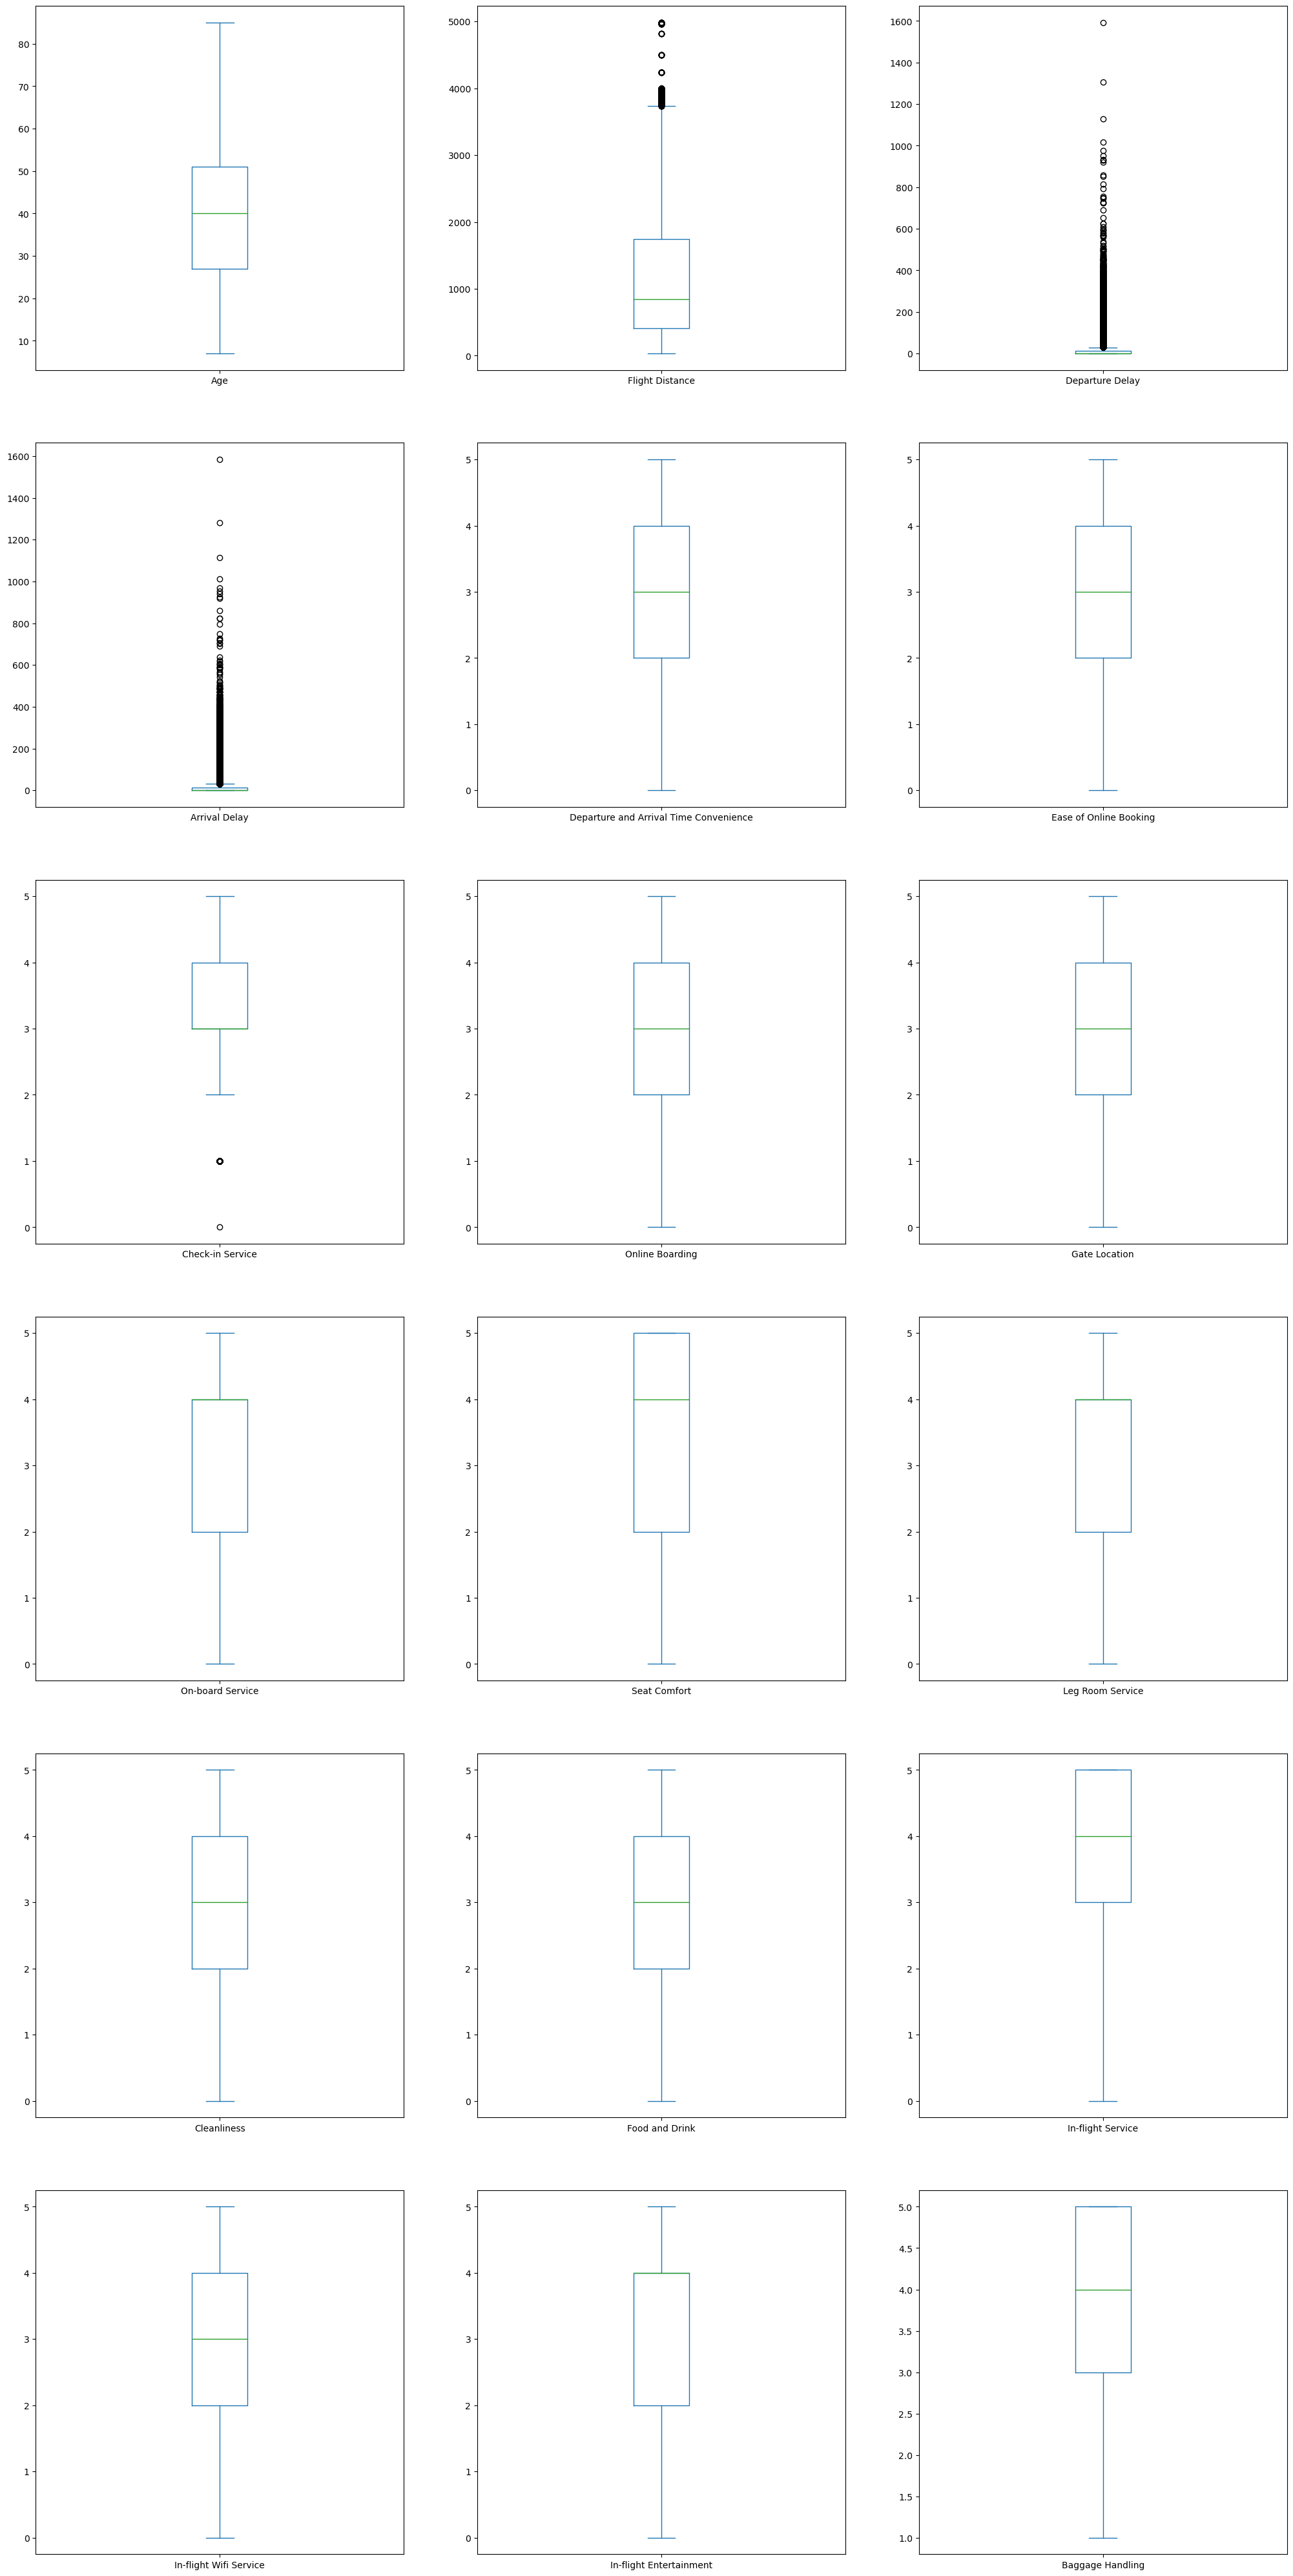

In [21]:
df.plot(kind = 'box', subplots = 1, layout = (7, 3), figsize = (25, 60))
plt.show()

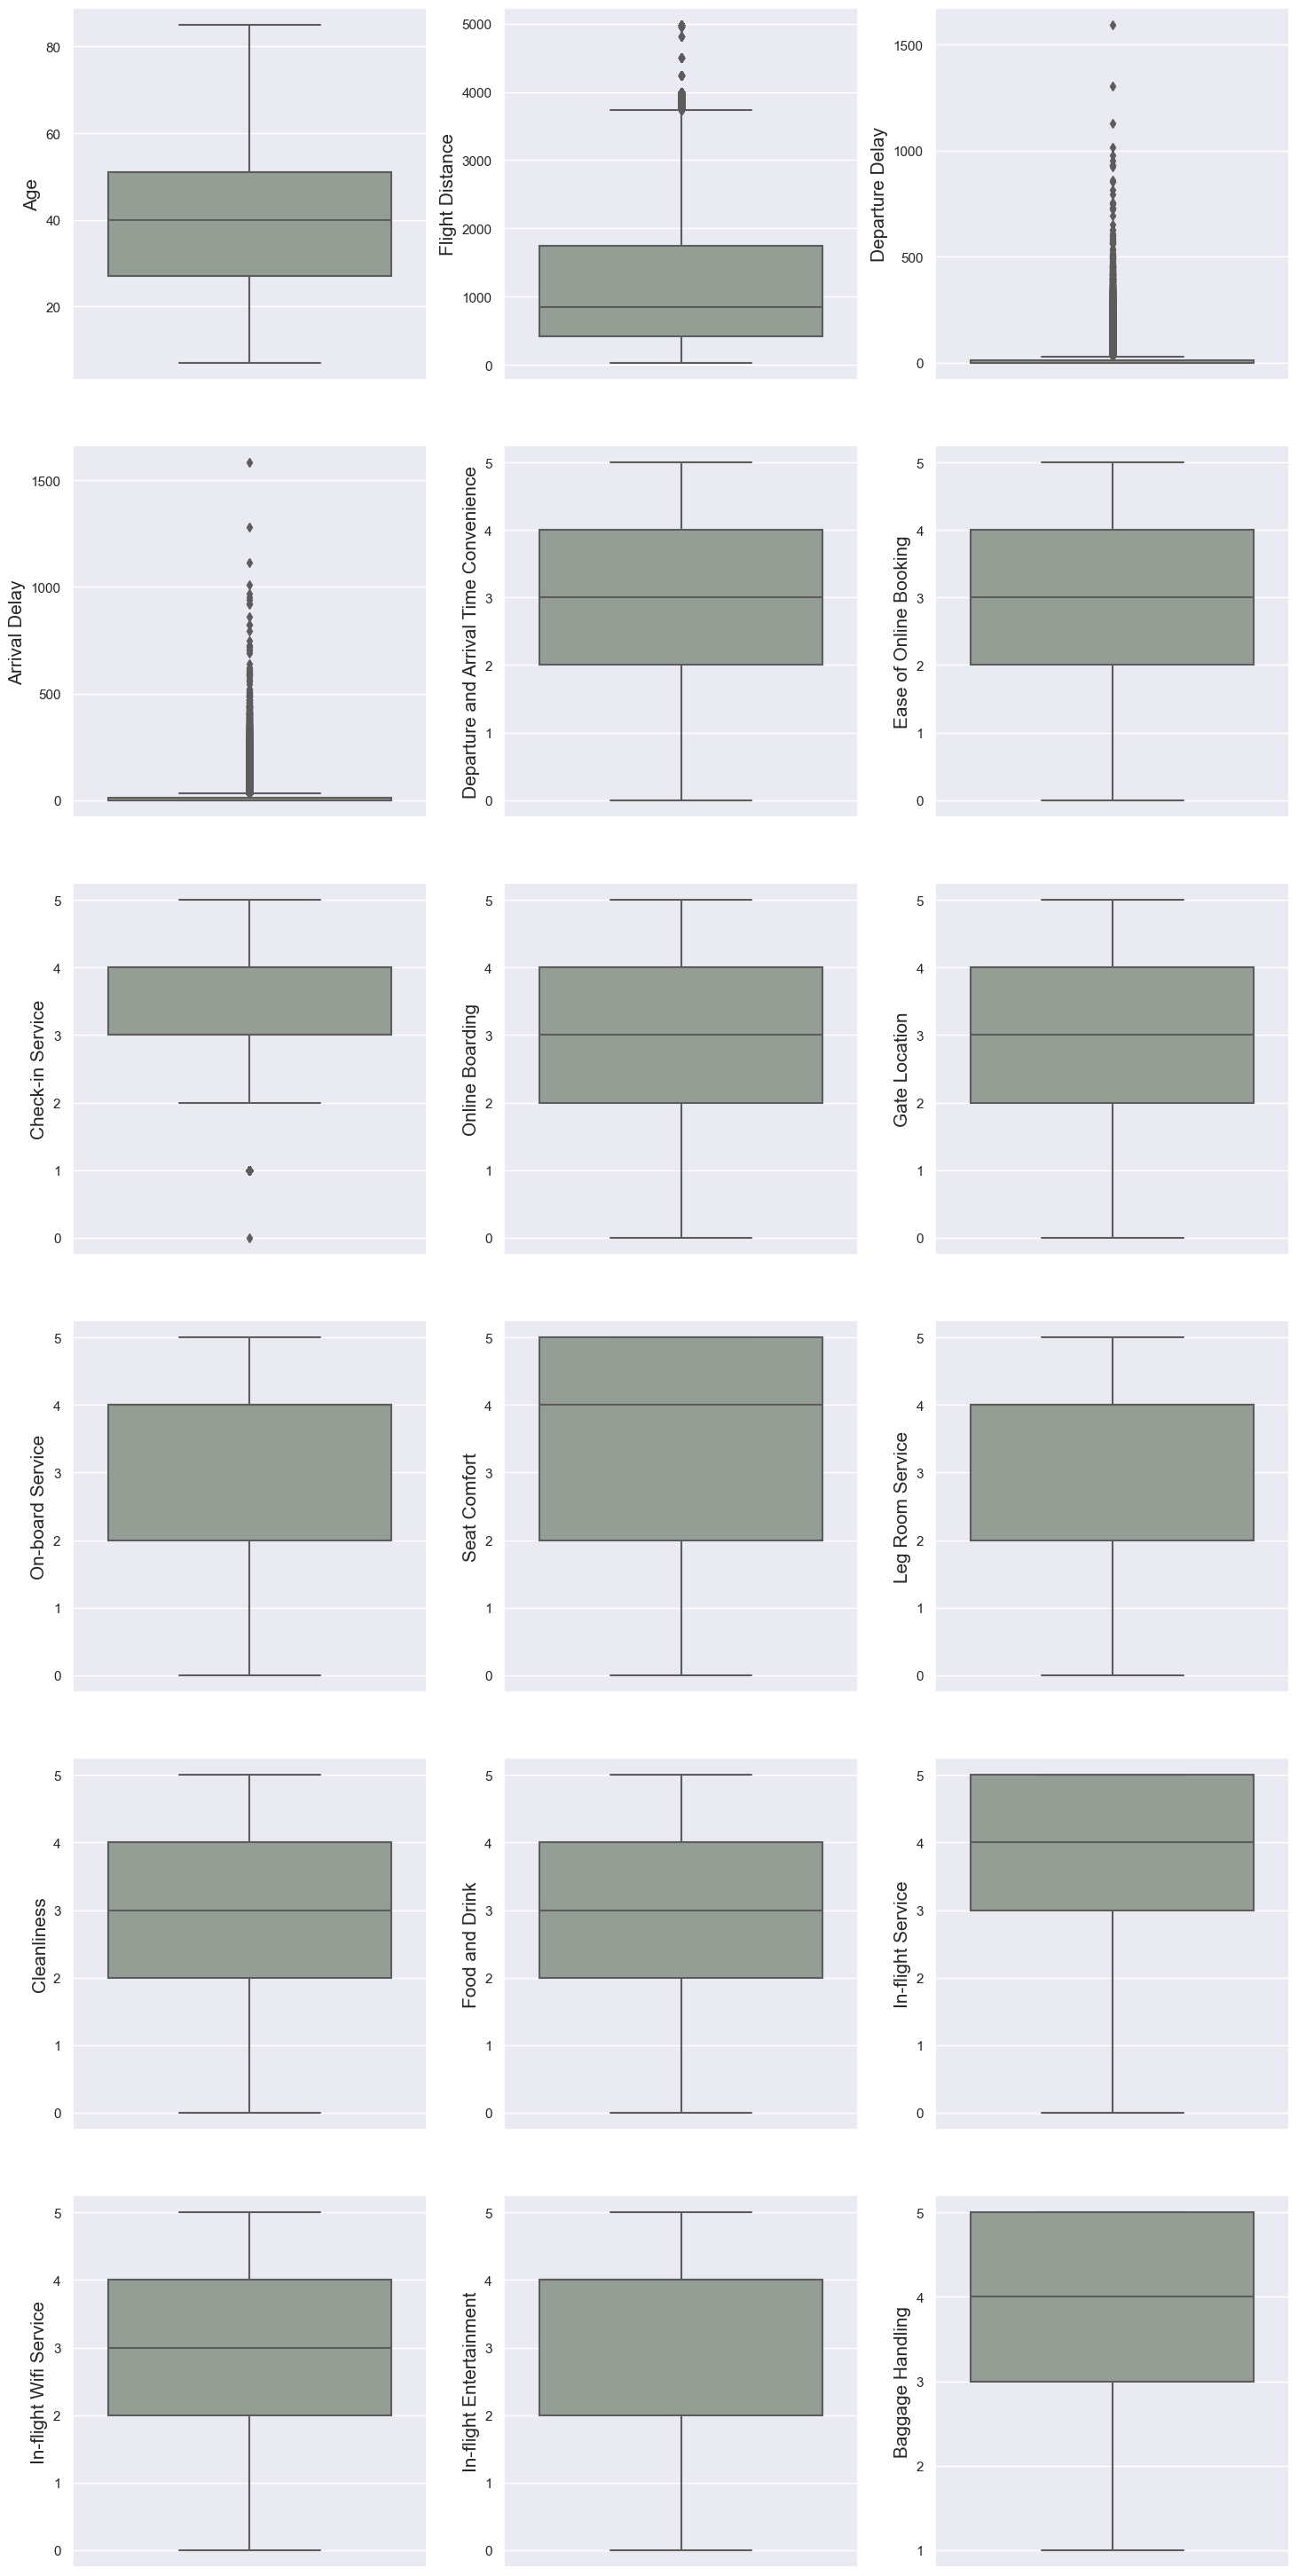

In [22]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(6, 3, figsize=(15,30))
fig.tight_layout(pad=3.0)

for f,ax in zip(numericals,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df,y=df[f],color='#93a092')

Dari hasil Boxplot untuk setiap kolom numerik, secara keseluruhan tidak terdapat Outlier, kecuali pada 4 kolom, antara lain kolom `Flight Distance`, `Departure Delay`,	`Arrival Delay` dan `Check-in Service`. Outlier pada kolom `Flight Distance` tidak layak untuk dihapus, karena tidak berpotensi untuk membiaskan analisis karena dalam skala jarak jika mendapatkan nilai 5000 itu sangat mungkin terjadi dan juga outlier pada kolom `Check-in Service` karena dalam skala 0-5 jika mendapatkan nilai 0 dan 1 itu sangat mungkin terjadi jadi tidak ada keharusan bagi outlier tersebut untuk didrop (penanganan khusus). Sedangkan outlier pada kolom `Departure Delay` dan `Arrival Delay` juga tidak layak untuk dihapus karena outlier tersebut merupakan sebuah fakta, berarti diperlukan sebuah penangan khusus agar waktu delay nya tidak terlalu lama.

In [23]:
# Untuk Memastikan profil lengkap Outlier 1:
outlier1 = df['Flight Distance'].max()

df[df['Flight Distance'] == outlier1]

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
31811,Male,42,Returning,Business,Business,4983,0,0.0,3,3,...,5,4,4,4,5,2,3,4,3,Satisfied
31812,Female,37,Returning,Business,Business,4983,0,2.0,3,2,...,1,4,5,4,4,3,2,3,1,Satisfied
31814,Female,49,Returning,Business,Business,4983,0,14.0,1,1,...,5,4,2,4,4,4,4,2,3,Neutral or Dissatisfied
31815,Female,45,Returning,Personal,Economy,4983,2,0.0,1,3,...,5,1,2,1,3,4,3,2,3,Neutral or Dissatisfied
31816,Male,38,Returning,Business,Economy Plus,4983,2,0.0,4,4,...,4,4,3,4,4,5,4,3,5,Satisfied
31869,Female,63,Returning,Personal,Business,4983,3,0.0,5,0,...,2,1,4,1,0,5,0,3,3,Satisfied
31870,Female,50,Returning,Business,Business,4983,0,0.0,4,5,...,2,5,4,5,5,5,5,3,3,Satisfied
31871,Male,46,Returning,Business,Business,4983,0,0.0,1,1,...,3,4,5,4,4,3,1,1,5,Satisfied
31872,Female,50,Returning,Business,Business,4983,0,0.0,4,4,...,2,4,4,4,4,3,4,2,4,Satisfied
31873,Female,33,Returning,Business,Business,4983,0,0.0,1,1,...,1,4,4,4,4,3,1,4,5,Satisfied


In [24]:
# Untuk Memastikan profil lengkap Outlier 2:
outlier2 = df['Departure Delay'].max()

df[df['Departure Delay'] == outlier2]

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
73470,Female,47,Returning,Personal,Economy,1120,1592,1584.0,2,2,...,4,2,4,2,2,3,2,2,4,Neutral or Dissatisfied


In [25]:
# Untuk Memastikan profil lengkap Outlier 3:
outlier3 = df['Arrival Delay'].max()

df[df['Arrival Delay'] == outlier3]

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
73470,Female,47,Returning,Personal,Economy,1120,1592,1584.0,2,2,...,4,2,4,2,2,3,2,2,4,Neutral or Dissatisfied


In [26]:
# Untuk Memastikan profil lengkap Outlier 4:
outlier4 = df['Check-in Service'].min()

df[df['Check-in Service'] == outlier4]

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
21092,Female,44,Returning,Business,Business,214,200,233.0,5,5,...,4,0,3,0,1,1,4,4,3,Neutral or Dissatisfied


In [27]:
df['Check-in Service'].unique()

array([4, 3, 1, 2, 5, 0], dtype=int64)

## 2. Plot KDE untuk Mengetahui Bentuk Distribusi

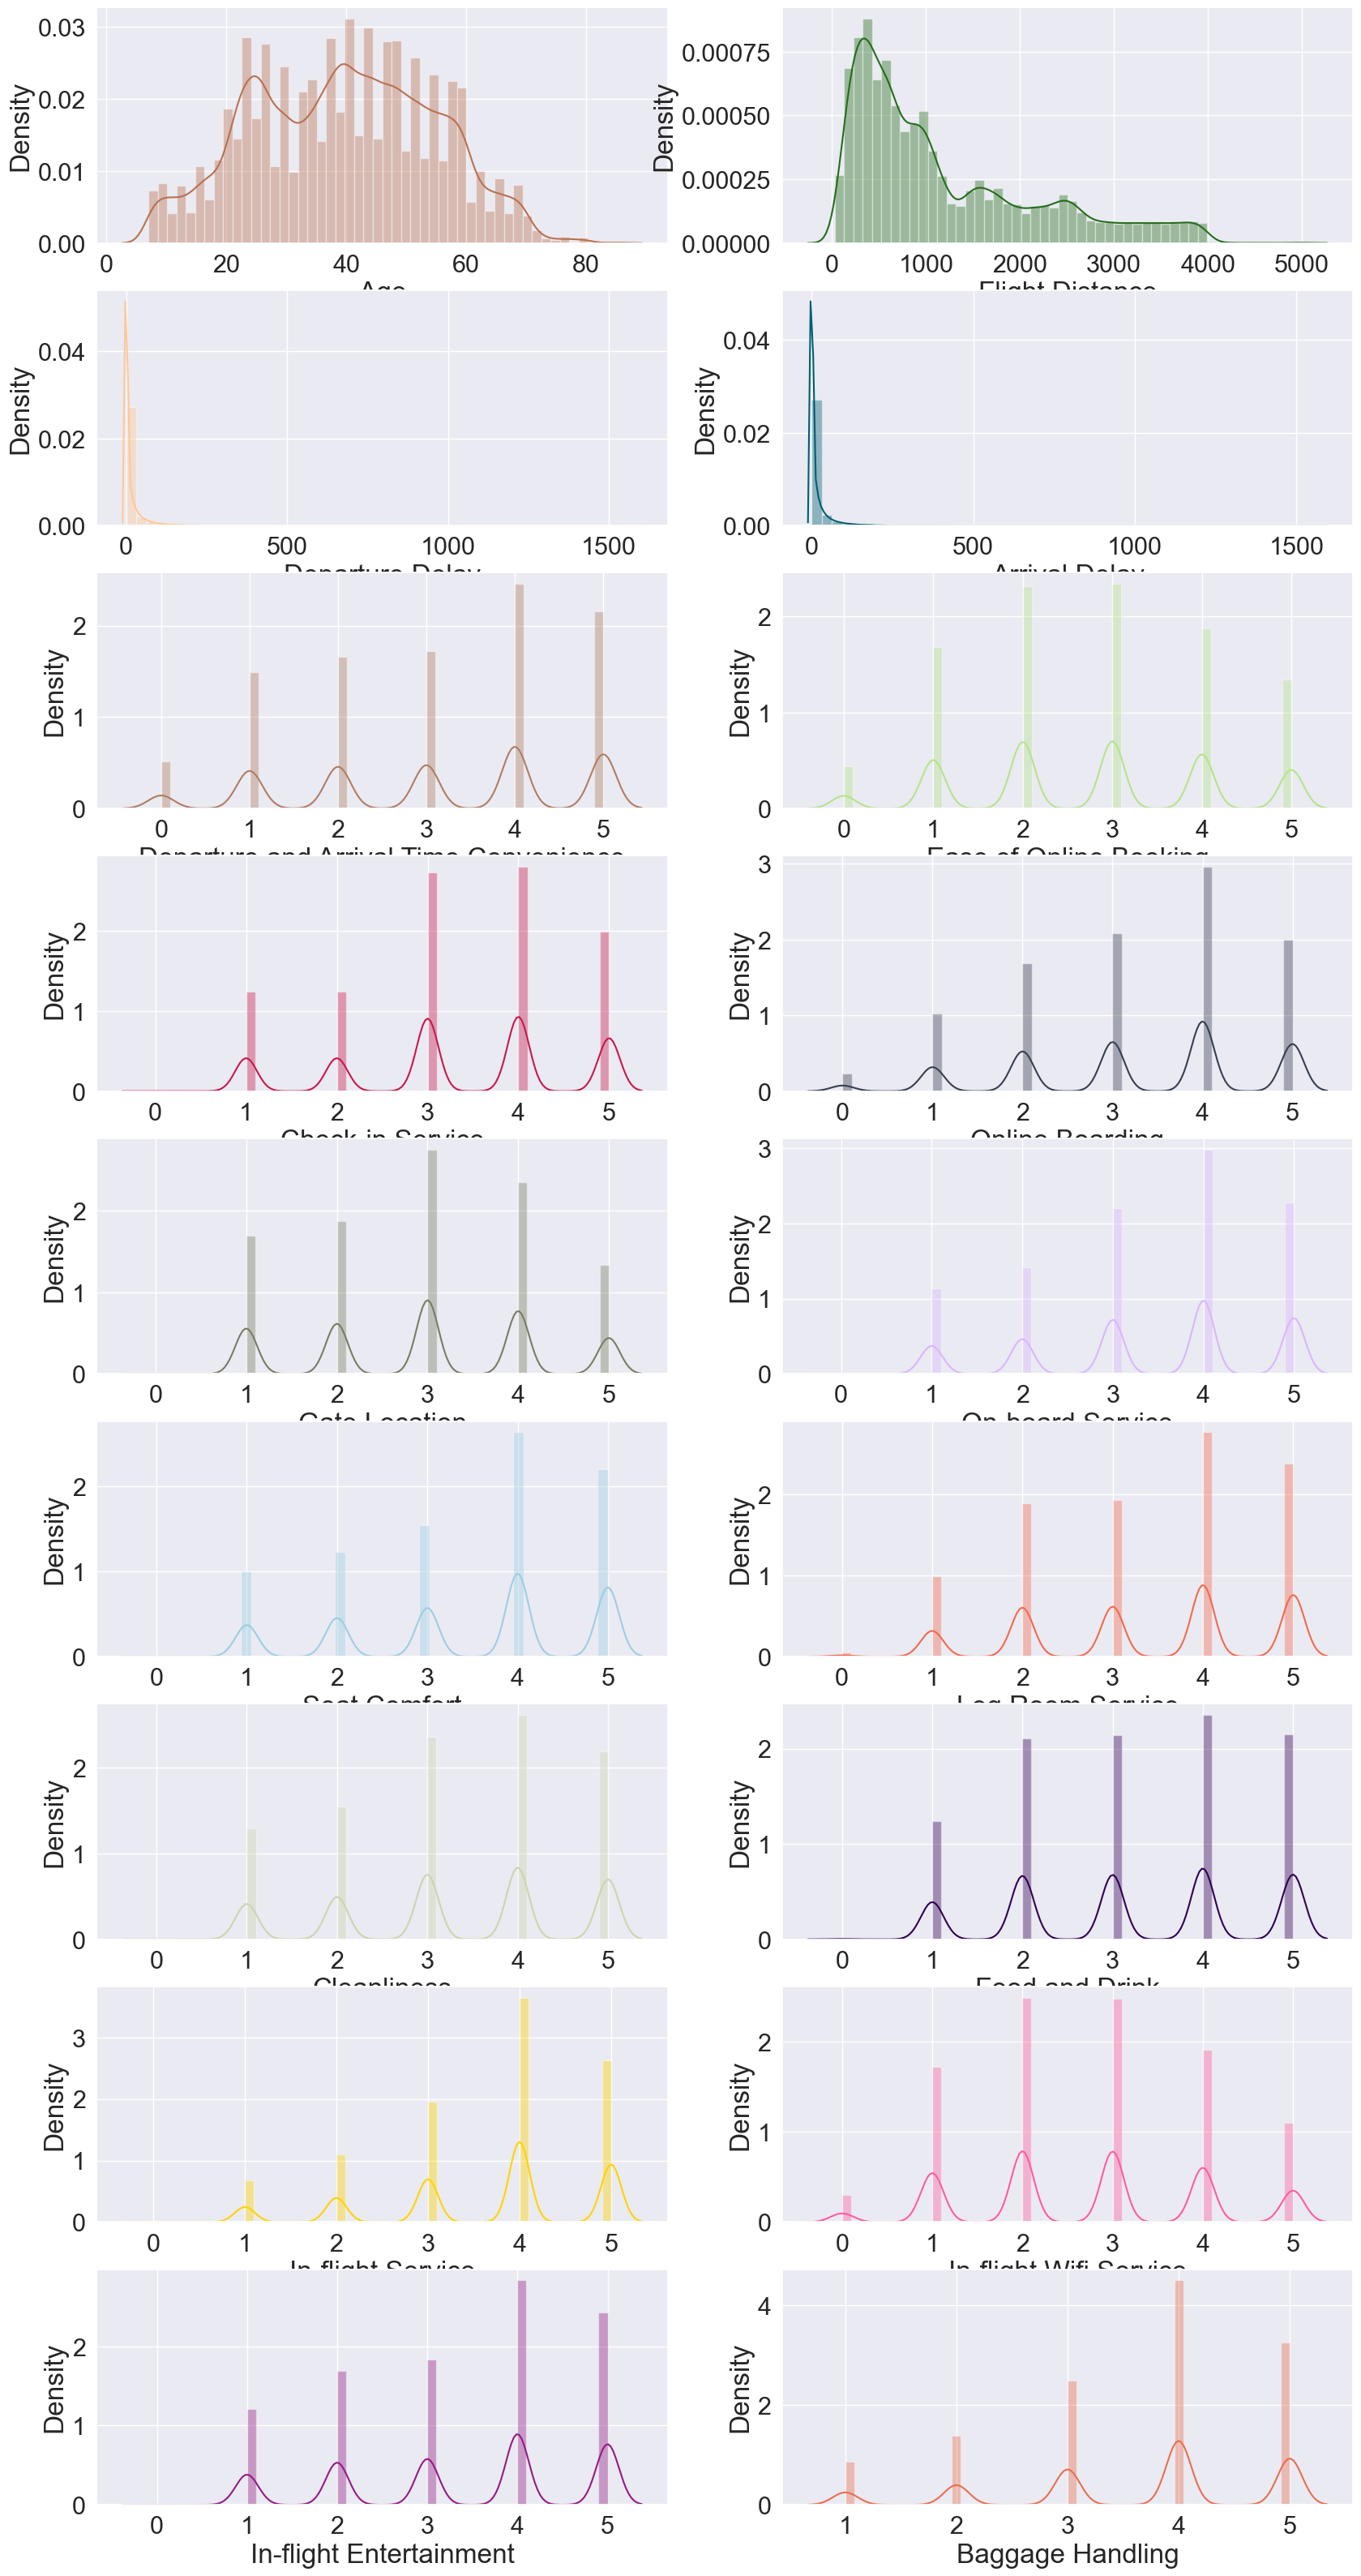

In [28]:
f, axes = plt.subplots(9, 2, figsize=(20,40), sharex=False)
sns.distplot(df.iloc[:,1], color="#b97150", ax=axes[0,0])
sns.distplot(df.iloc[:,5], color="#256d1b", ax=axes[0,1])
sns.distplot(df.iloc[:,6], color="#fec89a", ax=axes[1,0])
sns.distplot(df.iloc[:,7], color="#005f73", ax=axes[1,1])
sns.distplot(df.iloc[:,8], color="#b07d62", ax=axes[2,0])
sns.distplot(df.iloc[:,9], color="#b5e48c", ax=axes[2,1])
sns.distplot(df.iloc[:,10], color="#c9184a", ax=axes[3,0])
sns.distplot(df.iloc[:,11], color="#373f51", ax=axes[3,1])
sns.distplot(df.iloc[:,12], color="#797d62", ax=axes[4,0])
sns.distplot(df.iloc[:,13], color="#dab6fc", ax=axes[4,1])
sns.distplot(df.iloc[:,14], color="#9dcee2", ax=axes[5,0])
sns.distplot(df.iloc[:,15], color="#f26a4f", ax=axes[5,1])
sns.distplot(df.iloc[:,16], color="#ccd5ae", ax=axes[6,0])
sns.distplot(df.iloc[:,17], color="#310055", ax=axes[6,1])
sns.distplot(df.iloc[:,18], color="#ffd300", ax=axes[7,0])
sns.distplot(df.iloc[:,19], color="#fe5d9f", ax=axes[7,1])
sns.distplot(df.iloc[:,20], color="#941b85", ax=axes[8,0])
sns.distplot(df.iloc[:,21], color="#e76f51", ax=axes[8,1])
plt.show()

Hasil Pengamatan dari KDE plot di atas diketahui bahwa:
1. Mengabaikan penafsiran kolom fitur dengan nilai diskrit terbatas (non-continues) pada 14 kolom, antara lain: `Departure and Arrival Time Convenience`, `Ease of Online Booking`, `Check-in Service`, `Online Boarding`, `Gate Location`, `On-board Service`, `Seat Comfort`, `Leg Room Service`, `Cleanliness`, `Food and Drink`, `In-flight Service`, `In-flight Wifi Service`, `In-flight Entertainment` dan `Baggage Handling`. Namun perlu dicatat apakah distribusi antar nilai uniknya cukup seimbang atau sangat timpang. Dalam dataset ini tidak terdapat kasus yg sangat timpang dan masih dapat untuk diterima.
2. Dalam kolom `Flight Distance` menghasilkan Positively Skewed, namun proporsinya tidak terlalu timpang dalam dataset. Tapi, kondisi ketidakseimbangan nya TIDAK parah (masih Oke). Jadi, jika nanti melakukan pemodelan dampak (implikasi) nya tidak perlu untuk menggunakan teknik-teknik untuk mengatasi data yg tidak seimbang (timpang). Sebagian besar penerbangan jarak tempuhnya kurang lebih sekitar 400 KM.
3. Fitur numerik kontinu (berkelanjutan) yang terdapat dalam kolom `Departure Delay` dan `Arrival Delay` agak simetris, cukup bagus (sehingga tidak perlu mengubahnya untuk mendekati distribusi normal). Namun pada kolom `Age` yg memiliki nilai rata-rata (mean) sebesar 39.4 dan mediannya bernilai 40.0 dan itu nilainya sangat dekat tidak terbukti untuk dapat disimpulkan bahwa kolom `Age` sepertinya memiliki distribusi yg cukup simetris.

# Exploratory Data Analysis (EDA):

## Pie Chart Percentage Distribution

In [29]:
non_continues = ['Departure and Arrival Time Convenience',
              'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
              'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 
              'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']
len(non_continues)

14

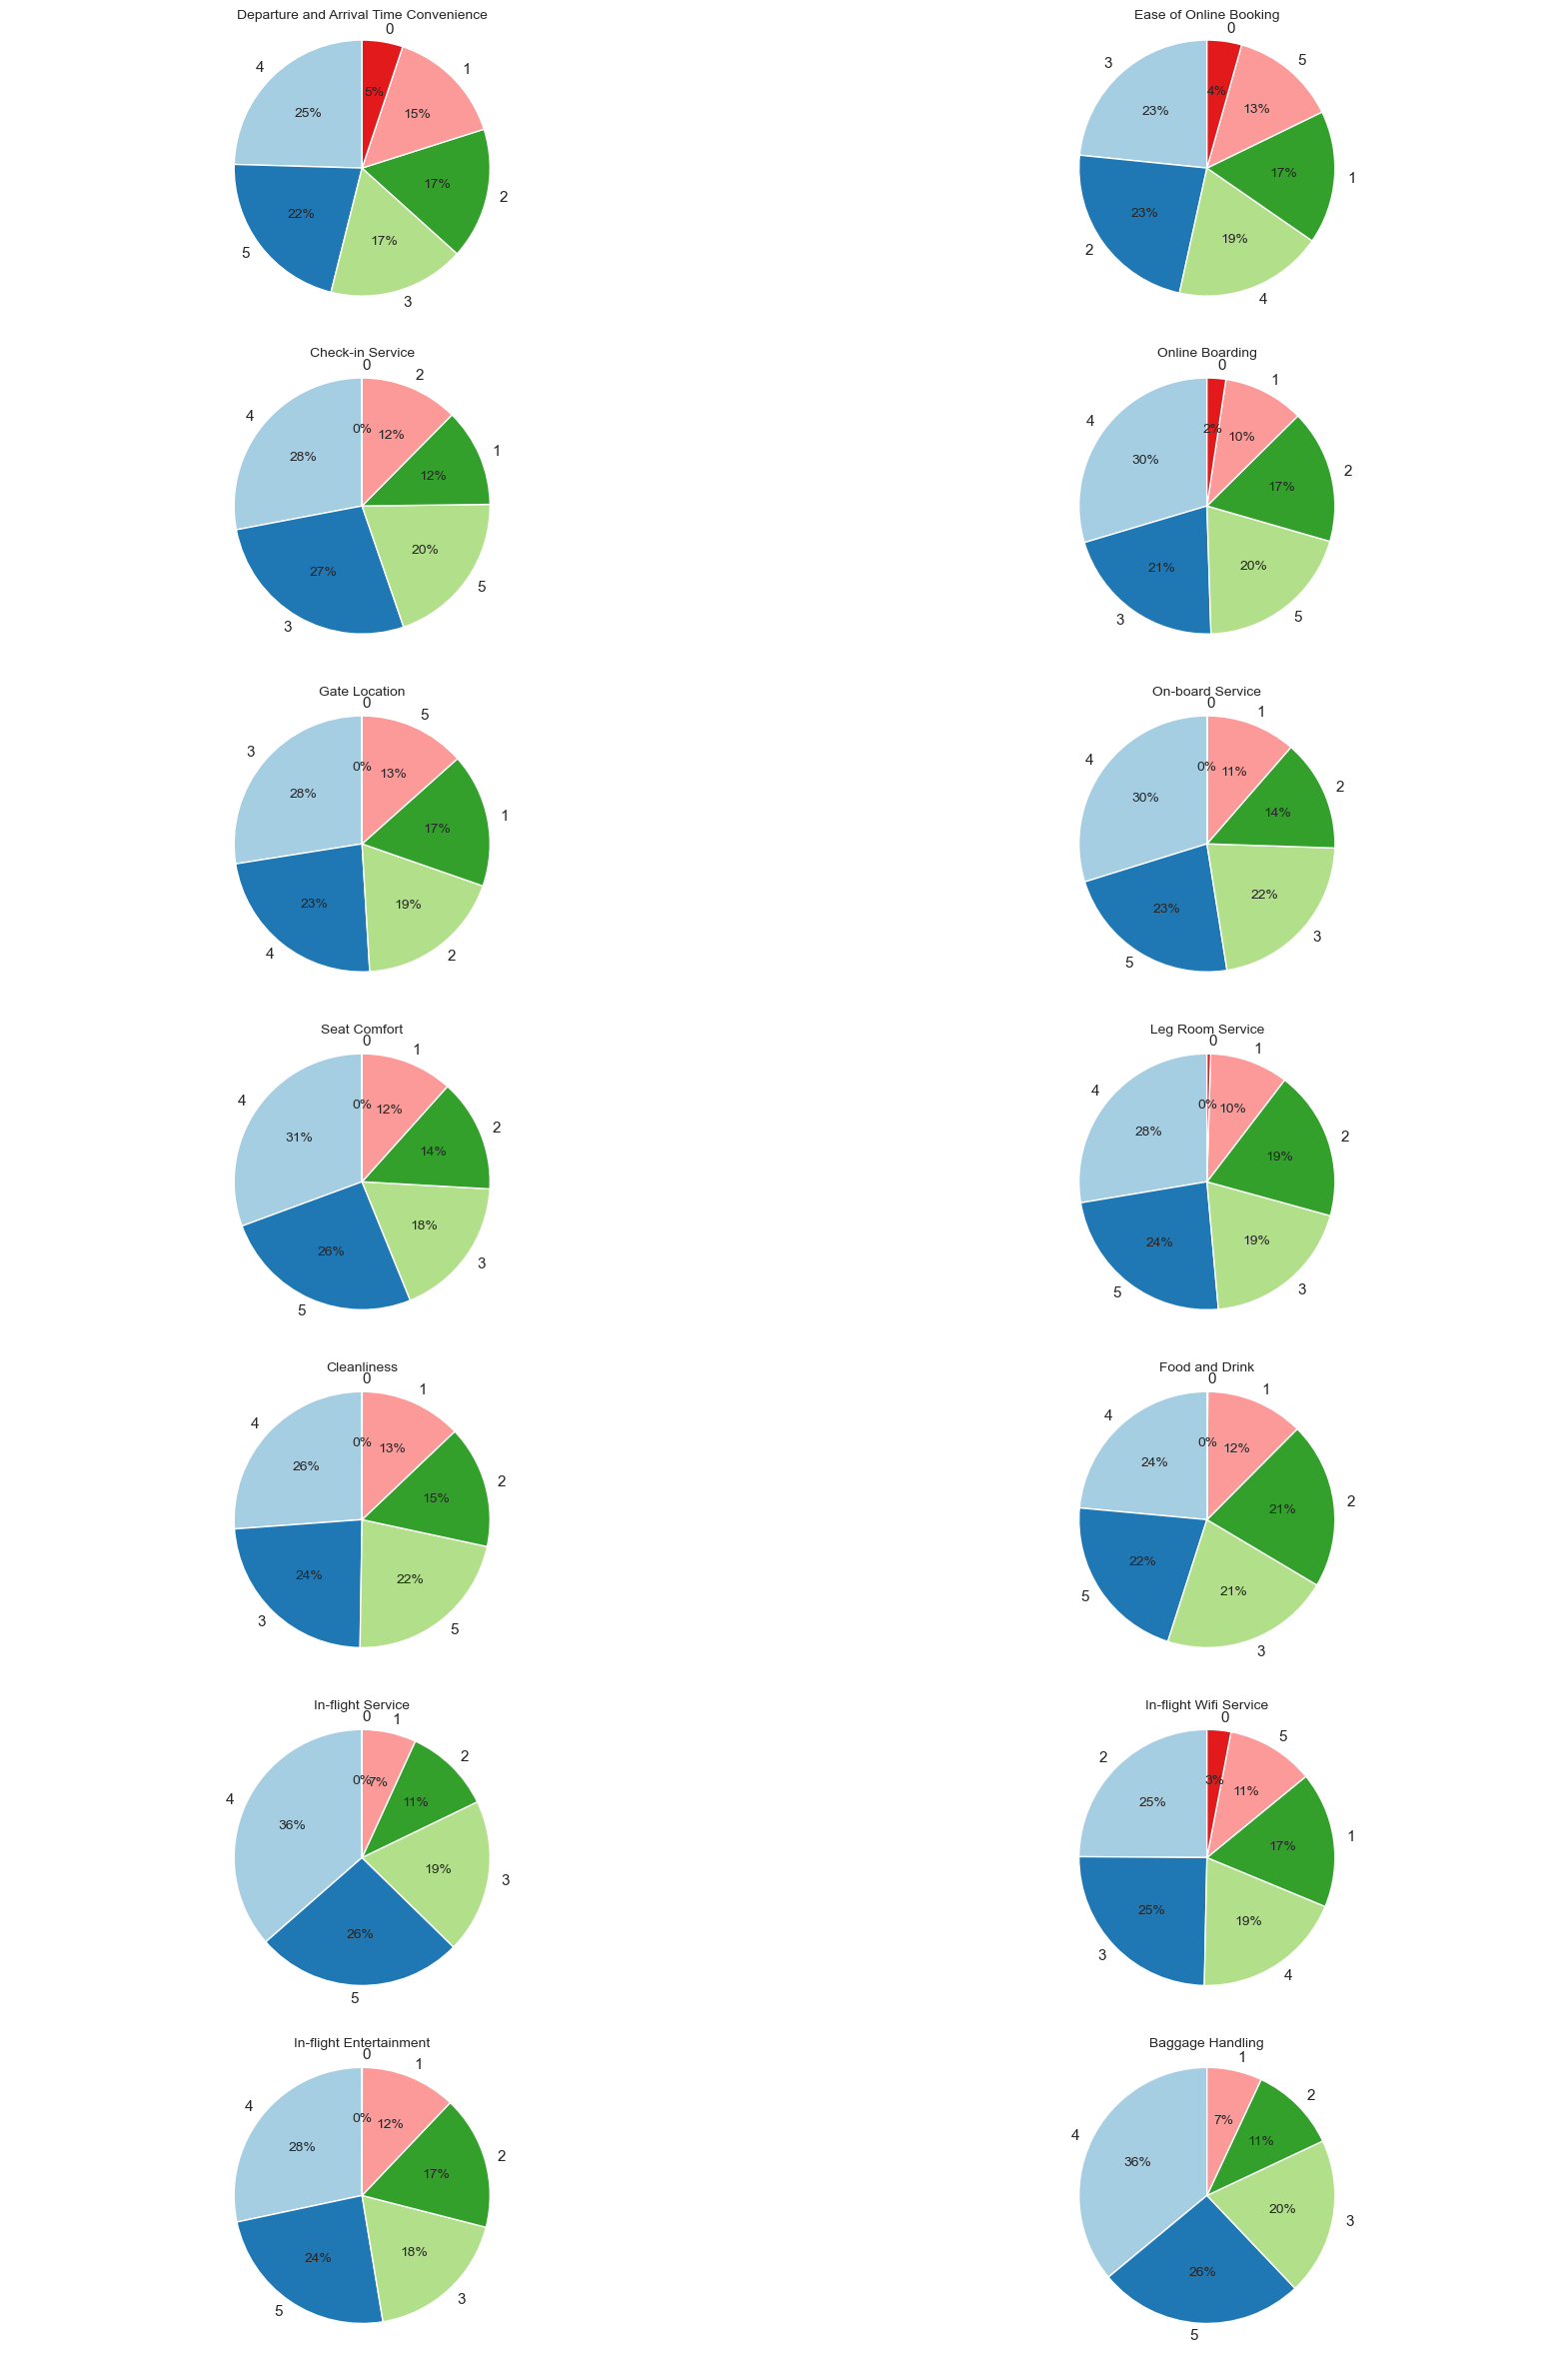

In [30]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(7, 2, figsize = (20, 30))
for i, col in enumerate(non_continues):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("Paired"),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

**Observation:**
- Lebih dari 50% (53%) penumpang merasa puas dengan On-board Service (dinilai 4–5 dari 5)
- Lebih dari 50% (57%) penumpang merasa nyaman duduk di kursi mereka (dinilai 4–5 dari 5)
- Lebih dari 50% (52%) penumpang merasa nyaman dengan jarak antar kursi di pesawat (dinilai 4–5 dari 5)
- Lebih dari 60% (62%) penumpang merasa puas dengan In-flight Service (dinilai 4–5 dari 5)
- Lebih dari 50% (52%) penumpang merasa puas dengan Hiburan yg disediakan selama Penerbangan (dinilai 4–5 dari 5)
- Lebih dari 60% (62%) penumpang merasa puas dengan Penanganan bagasi penumpang (dinilai 4–5 dari 5)

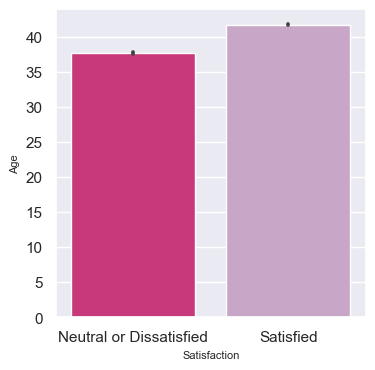

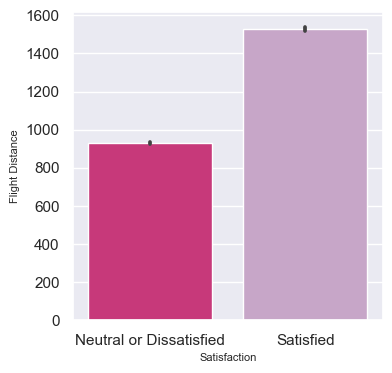

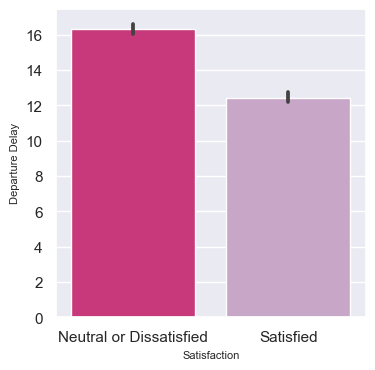

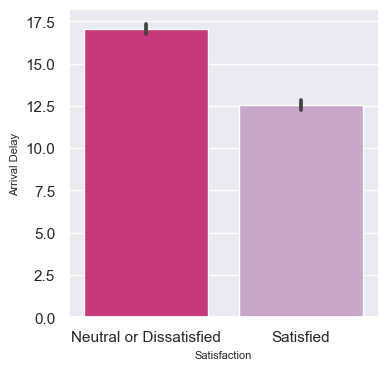

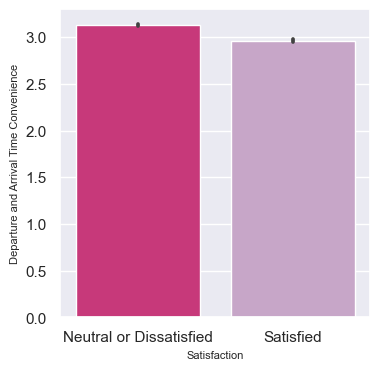

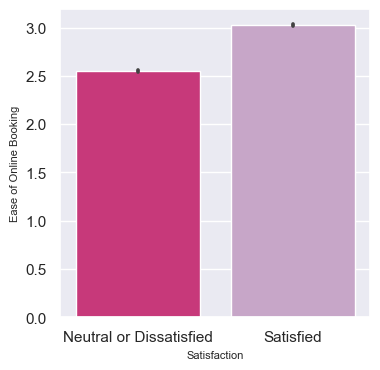

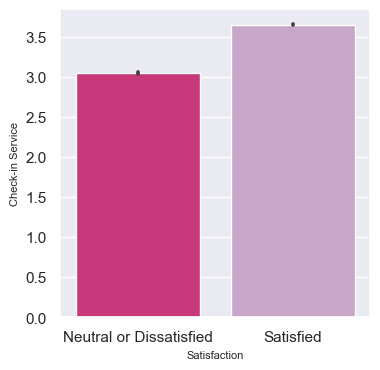

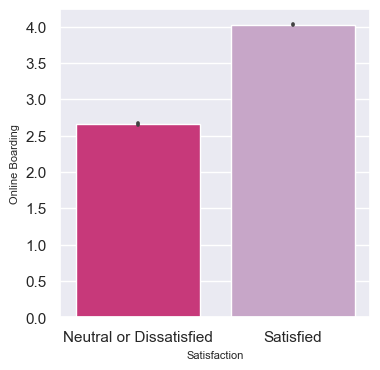

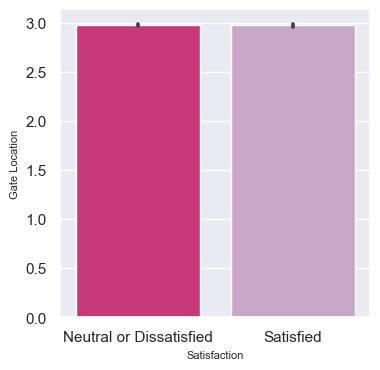

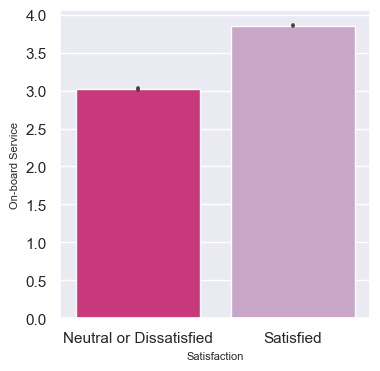

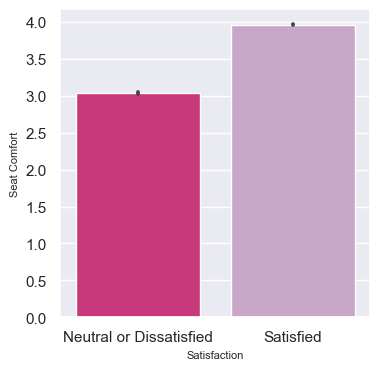

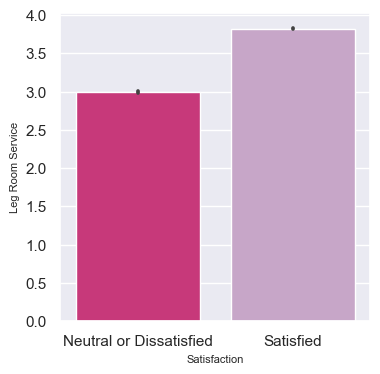

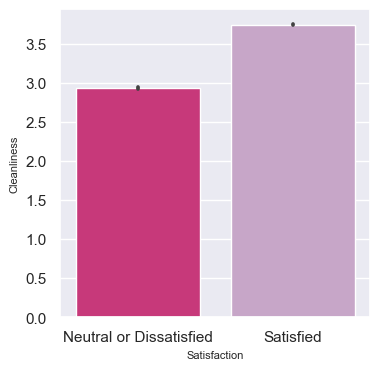

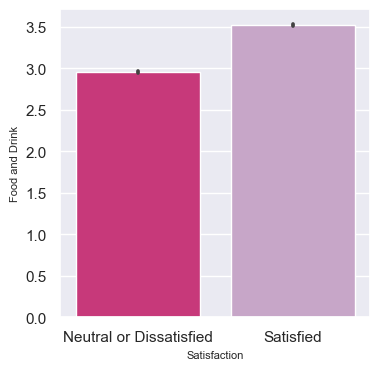

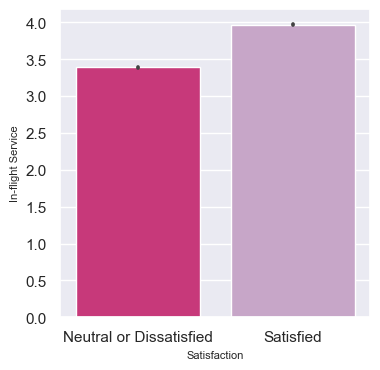

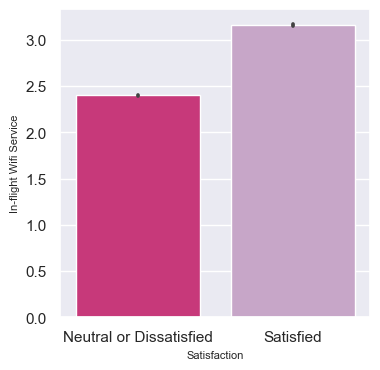

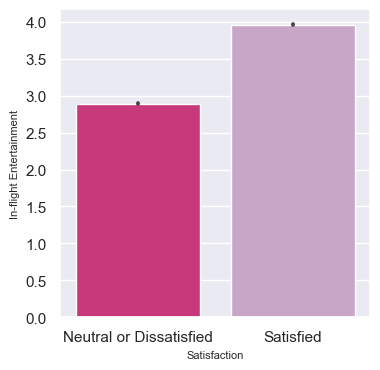

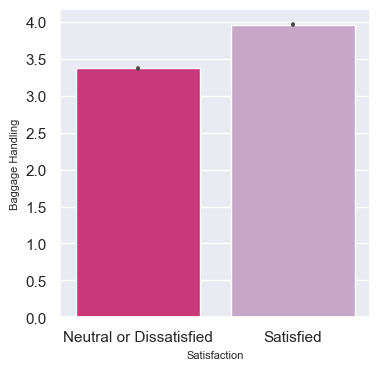

In [31]:
#Plotting the barplot of numerical features
sns.set(rc={'figure.figsize':(4, 4),
            "font.size":8,
            "axes.titlesize":8,
            "axes.labelsize":8},
             style="darkgrid")
for i in numericals:
    sns.barplot(data=df, x='Satisfaction', y=i, palette='PuRd_r')
    plt.show()

**Observation:**
- Dari grafik di atas, diketahui bahwa lokasi Gerbang tidak berperan besar dalam kepuasan penumpang.
Oleh karena itu akan mengabaikan kolom tersebut.

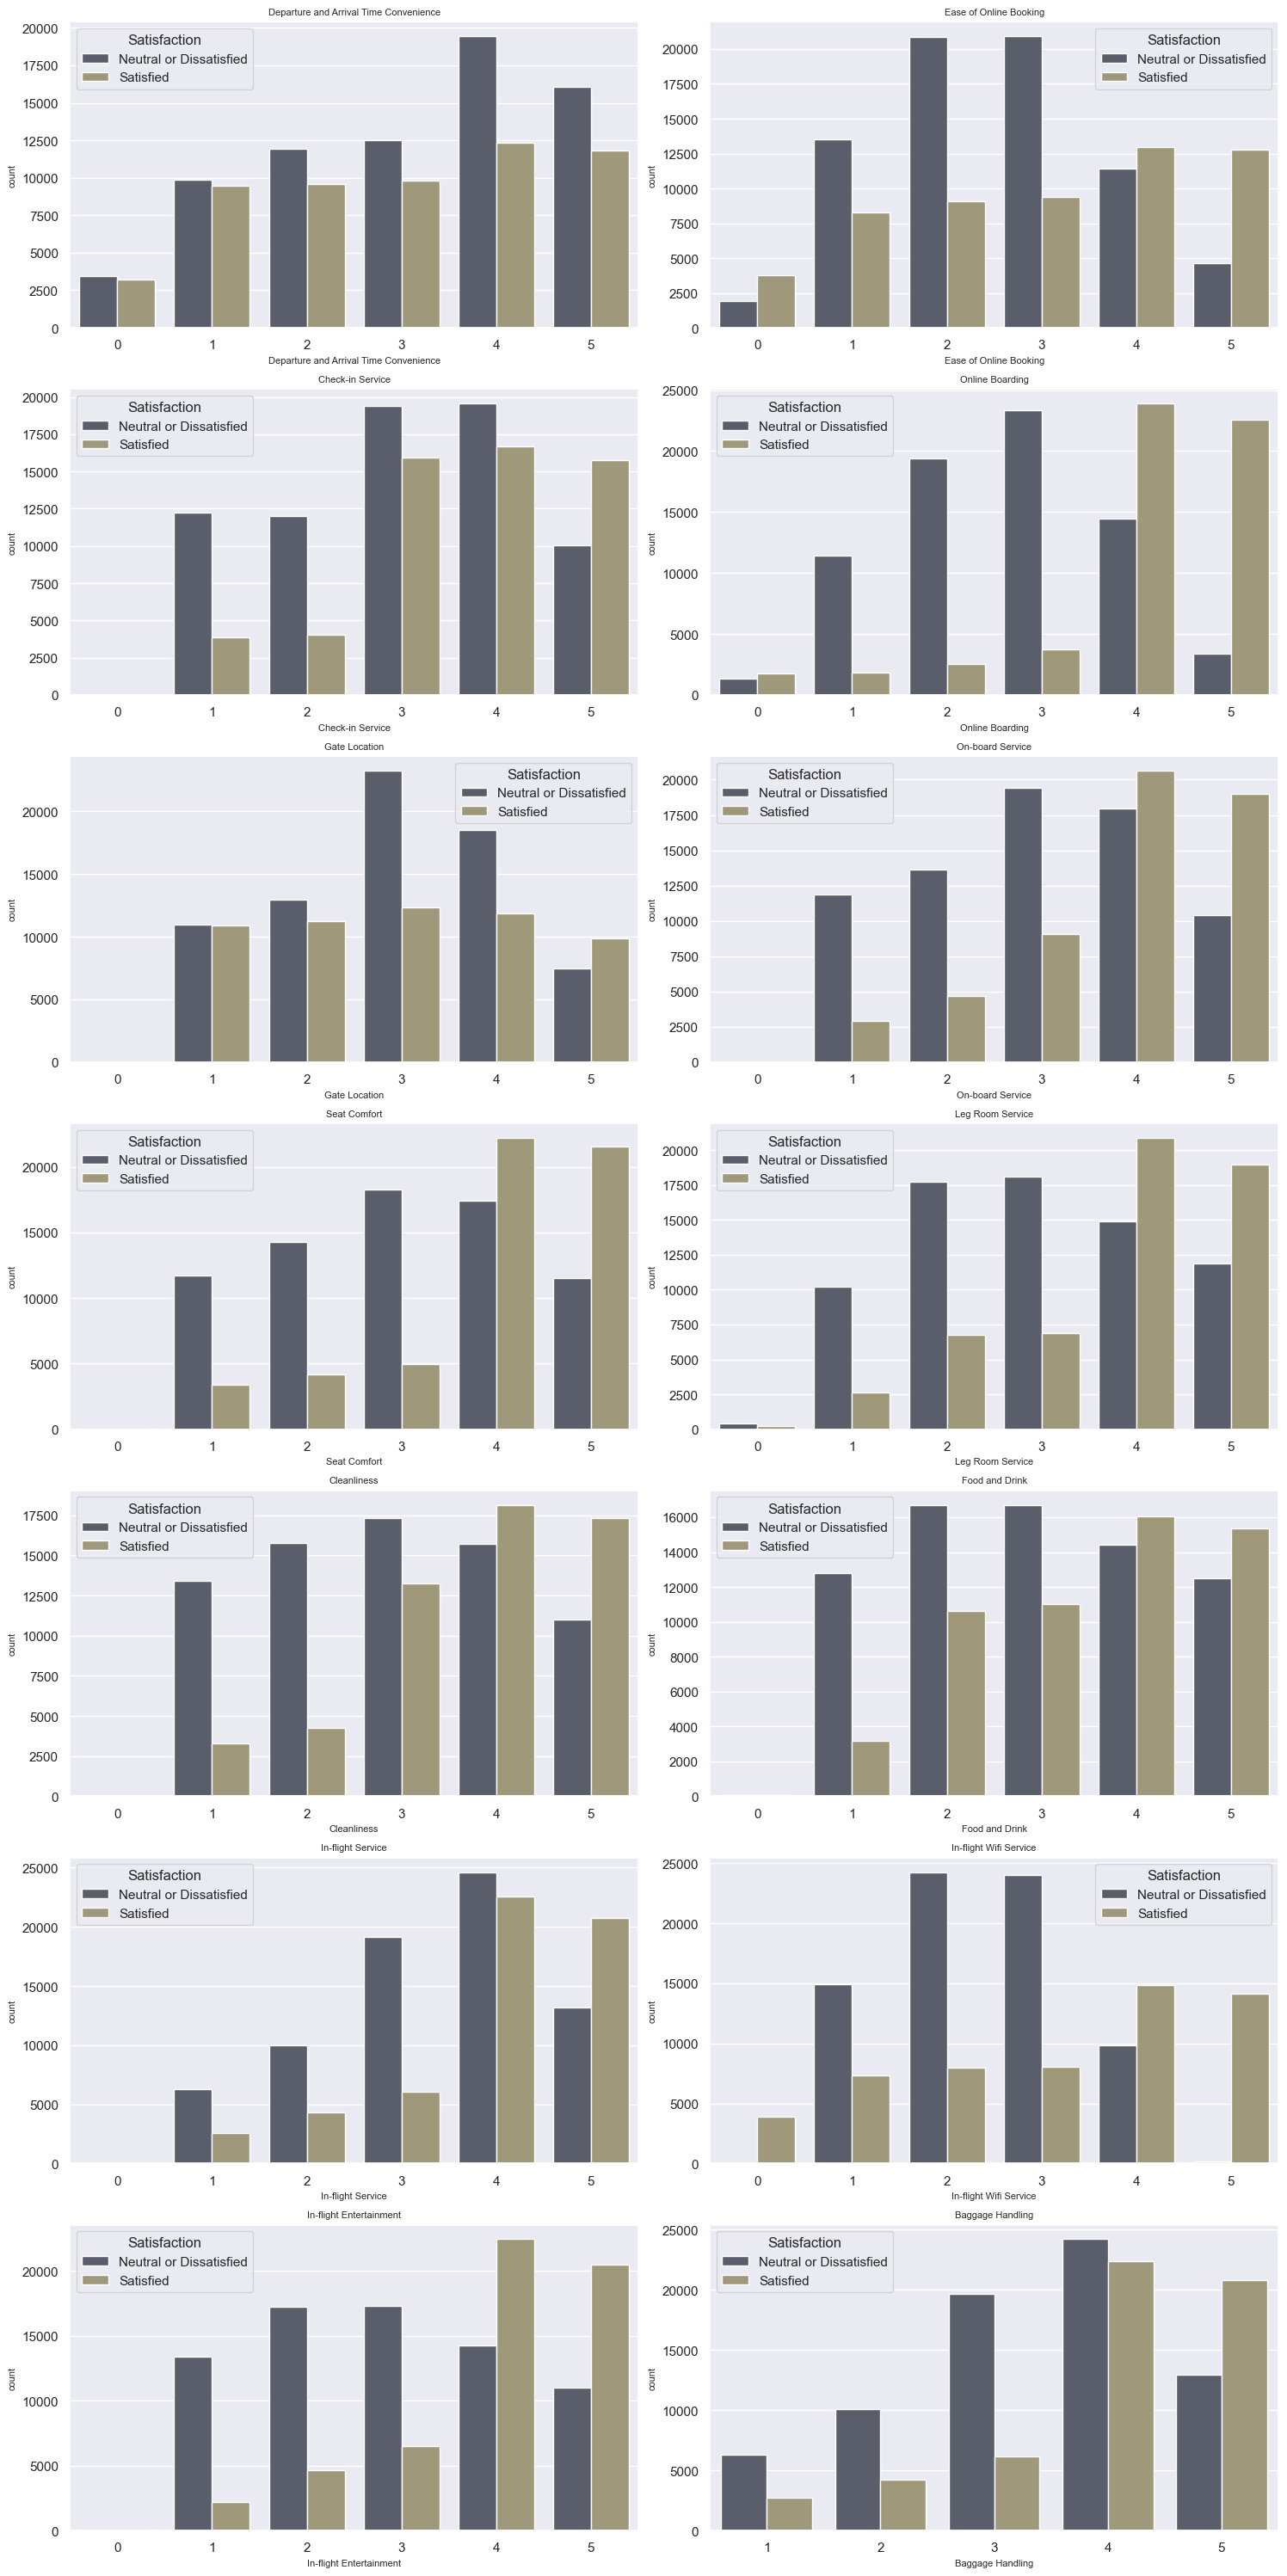

In [34]:
plt.figure(figsize=(15,30))
for i in range(len(non_continues)):
    plt.subplot(7,2,i+1)
    plt.title(non_continues[i])
    sns.countplot(x=df[non_continues[i]],hue=df['Satisfaction'], palette = 'cividis')    
plt.tight_layout()

#### B. Kolom Categorical:

## Menggunakan Countplot u/ Kolom Categorical:

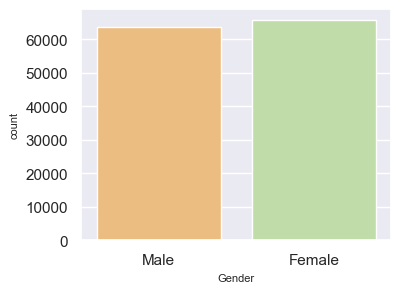

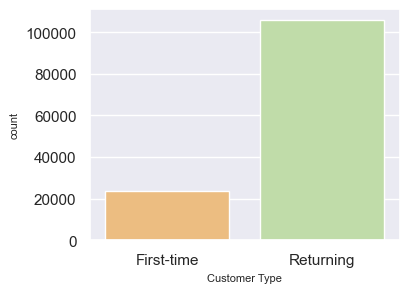

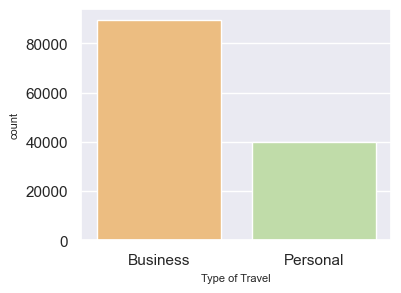

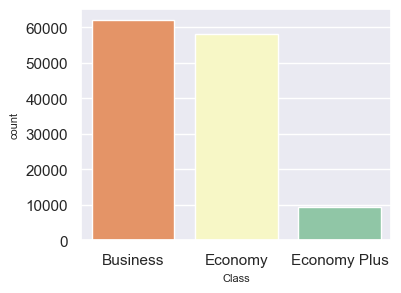

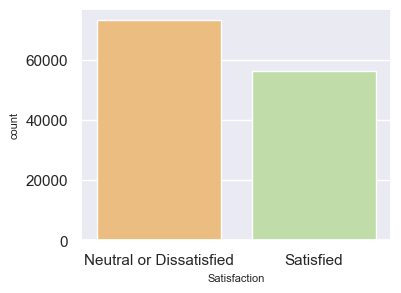

In [35]:
for col in categoricals:
    plt.figure(figsize = (4, 3))
    sns.countplot(x = col, data = df, palette = "Spectral")
    plt.show();

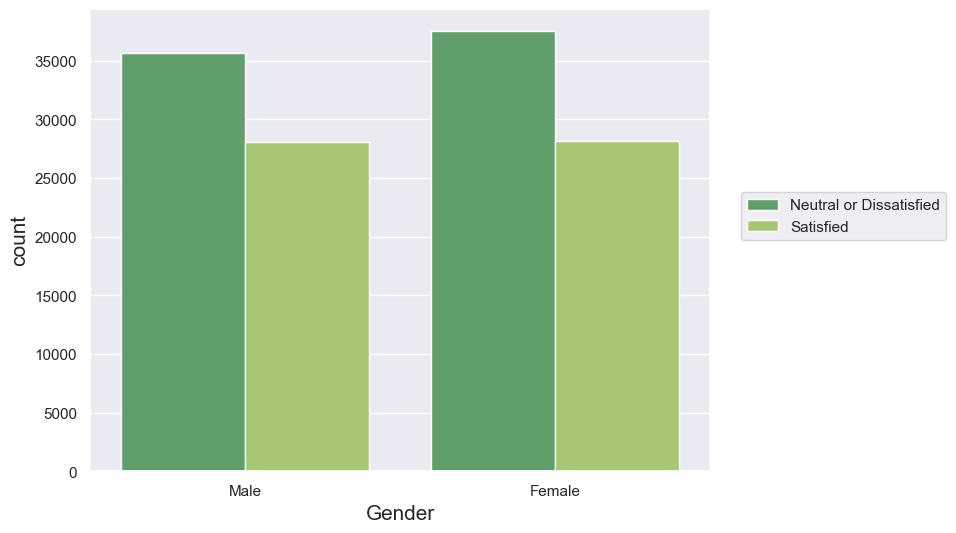

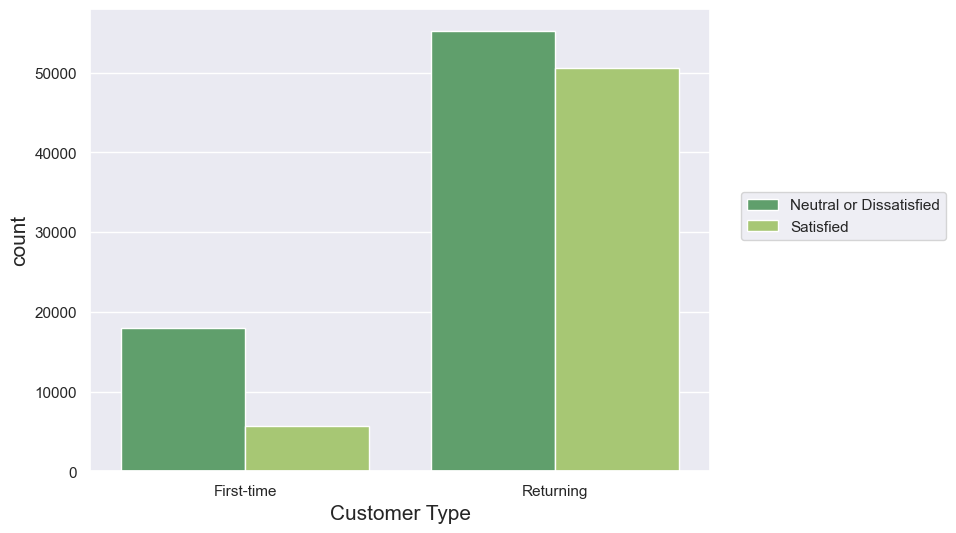

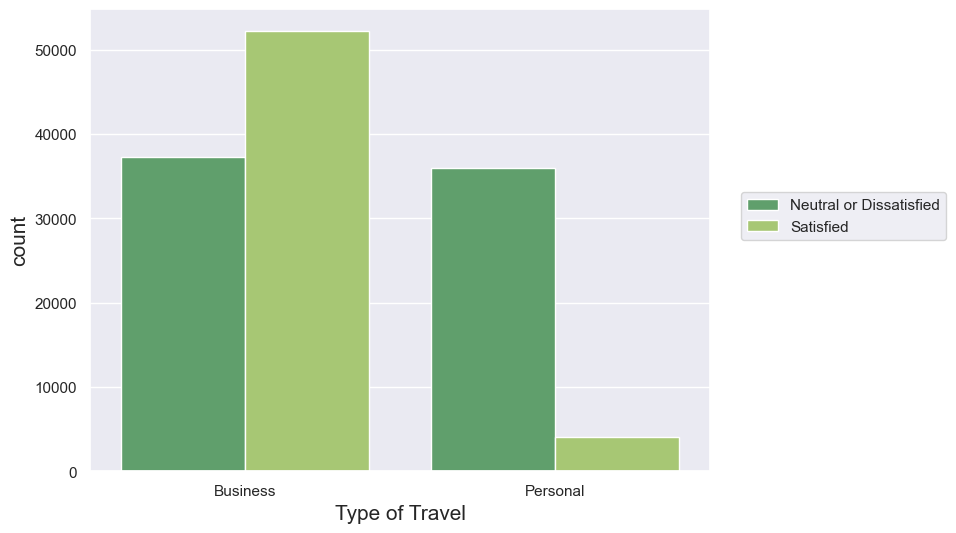

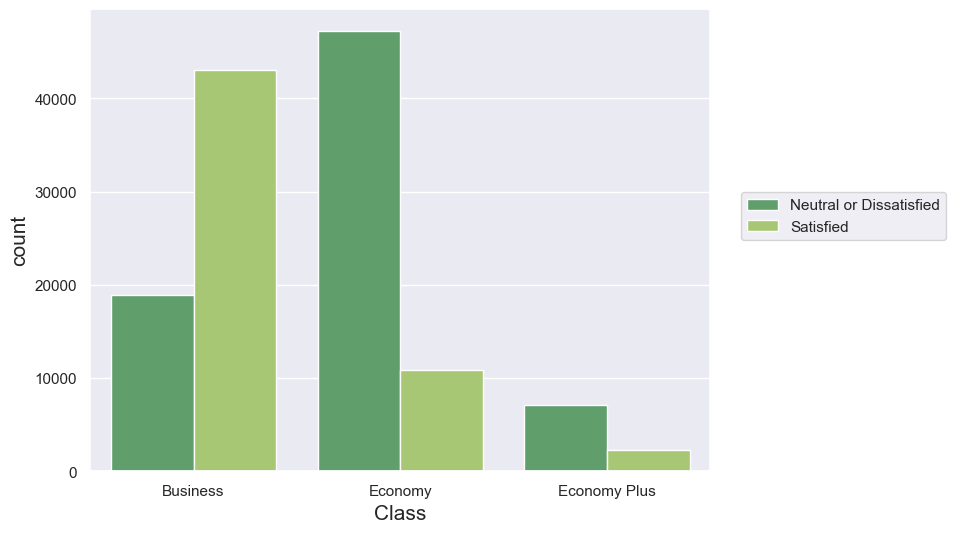

In [36]:
sns.set(rc={'figure.figsize':(8, 8),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categoricals[:-1]:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(data=df, x=col, hue ='Satisfaction', palette='summer')
    plt.legend(loc=(1.05, 0.5))

**Observations:**
- Jenis kelamin tidak memainkan peran penting dalam kepuasan, karena pria dan wanita sepertinya sama-sama memperhatikan faktor yang sama.
- Jumlah pelanggan yg setia untuk maskapai tinggi, namun tingkat ketidakpuasannya tinggi terlepas dari loyalitas. Maskapai harus memperhatikan untuk mempertahankan pelanggan setia.
- Traveller dengan tujuan perjalanan bisnis tampaknya lebih puas dengan penerbangan, daripada traveller dengan tujuan perjalanan pribadi.
- Penumpang yg berada di kelas bisnis tampaknya merasa paling puas, sedangkan penumpang yang di kelas ekonomi merasa paling tidak puas.

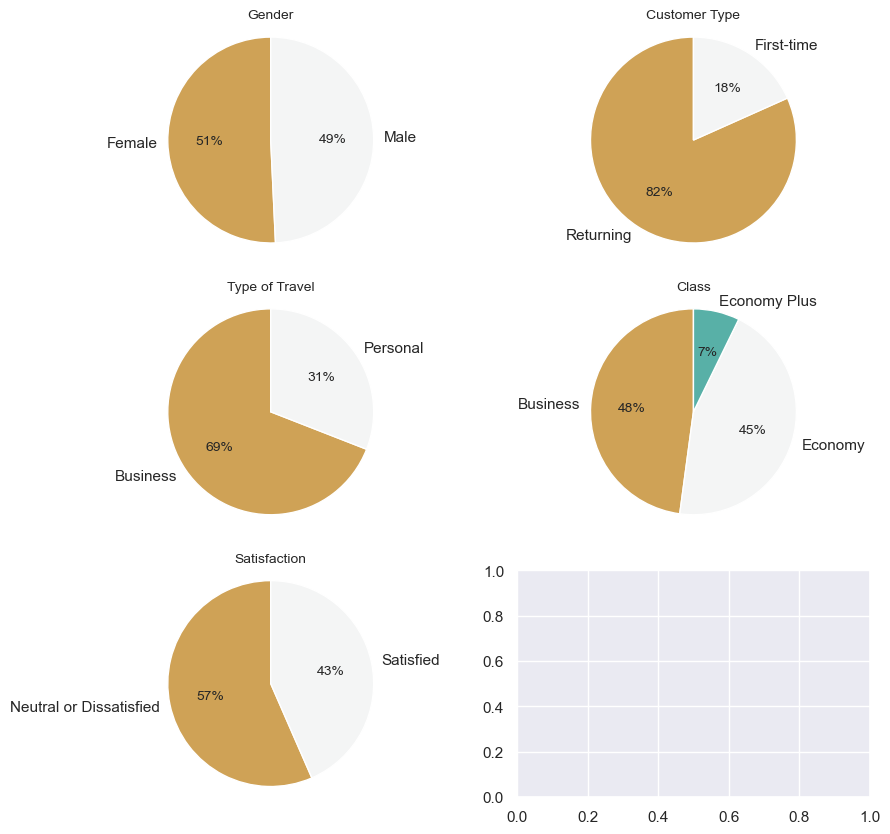

In [37]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
for i, col in enumerate(categoricals):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("BrBG", 3),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

**Observations:**
- Jumlah passenger berjenis kelamin perempuan lebih dominan dari laki-laki, namun perbandingan antara pria dan wanita dalam dataset ini kurang lebih sama.
- Sebagian besar passenger maskapai adalah passenger yang sudah kesekian kali menggunakan Airline tersebut (penumpang Loyal(Returning)).
- Sebagian besar passenger terbang karena alasan bisnis daripada alasan pribadi.
- Sekitar setengah dari passenger berada di kelas bisnis.
- Sebanyak hampir 60% dari passenger merasa netral atau tidak puas dari penumpang yang puas (Jumlah penumpang yang netral atau tidak puas lebih besar dari penumpang yang puas).

## Pertanyaan EDA:

1. Bagaimana tingkat kepuasan penumpang maskapai berdasarkan Departure Delay dan Arrival Delay? 
2. Bagaimana tingkat kepuasan penumpang maskapai jika dilihat berdasarkan Flight Distance dan Departure Delay?
3. Bagaimana demografi penumpang maskapai jika dilihat berdasarkan usia dan jenis perjalanan yg dilakukan oleh penumpang?
4. Bagaimana demografi penumpang maskapai jika dilihat berdasarkan usia dan kelas yg digunakan penumpang ketika menggunakan airline tersebut?
5. Bagaimana tingkat kepuasan penumpang maskapai jika dilihat berdasarkan Flight Distance? 

# 1. Departure Delay & Arrival Delay:

In [38]:
df.groupby('Satisfaction')['Departure Delay'].mean()

Satisfaction
Neutral or Dissatisfied    16.340184
Satisfied                  12.435001
Name: Departure Delay, dtype: float64

In [39]:
df.groupby('Satisfaction')['Arrival Delay'].mean()

Satisfaction
Neutral or Dissatisfied    17.055992
Satisfied                  12.533859
Name: Arrival Delay, dtype: float64

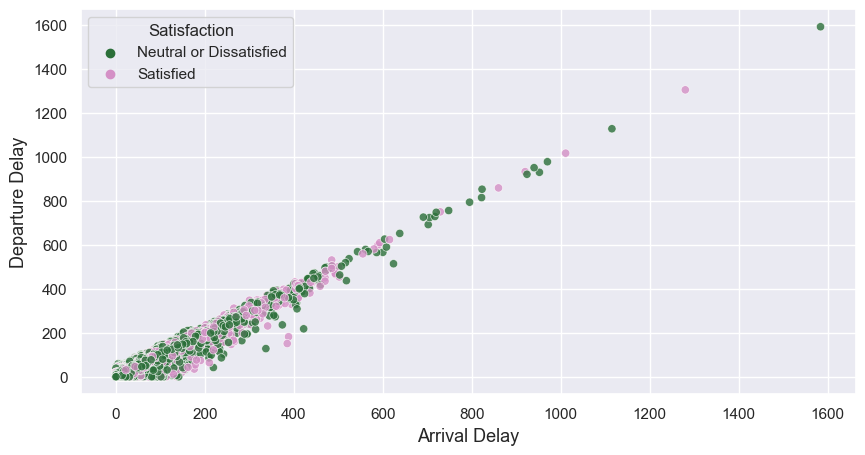

In [40]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=df, x='Arrival Delay', y='Departure Delay', hue='Satisfaction', palette='cubehelix', alpha=0.8);

**Observations:**
- Keterlambatan keberangkatan dan kedatangan tampaknya memiliki hubungan linier.
- Ada 1 penumpang yang merasa puas bahkan setelah adanya keterlambatan selama 1300 menit.

# 2. Flight Distance & Departure Delay:

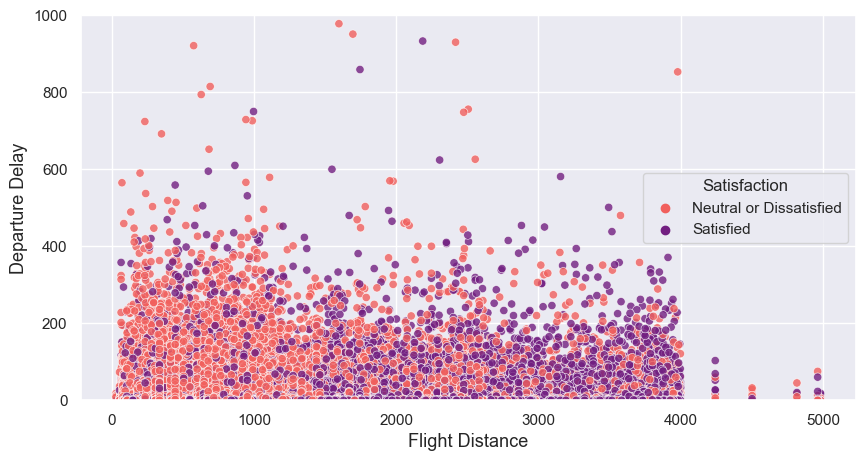

In [41]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='Flight Distance', y='Departure Delay', hue='Satisfaction', palette='magma_r', alpha=0.8)
plt.ylim(0,1000);

**Observations:**
- Ternyata semakin jauh jarak penerbangannya, sebagian besar penumpang merasa baik-baik saja dengan adanya sedikit keterlambatan keberangkatan.
- Sedangkan secara perbandingan, keterlambatan keberangkatan bukan merupakan faktor untuk penerbangan jarak jauh. Namun, traveller dengan jarak penerbangan yg dekat tampaknya tidak senang dengan keterlambatan keberangkatan.

# 3. Age & Customer Type:

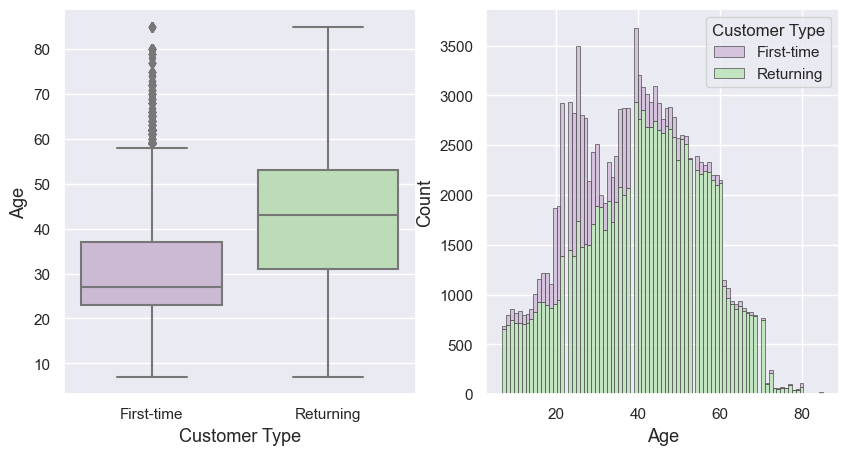

In [42]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "PRGn", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "PRGn", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

**Observations:**
- Dari data di atas dapat disimpulkan bahwa sebagian besar penumpang tetap (reguler) maskapai berusia antara 30 hingga 50 tahun (usia rata-rata penumpang sedikit di atas 40 tahun).
- Sedangkan untuk kisaran usia penumpang non-reguler (yang pertama kali menggunakan maskapai) sedikit lebih muda, berusia antara 20 hingga 40 tahun (usia rata-rata penumpang sedikit kurang dari 30 tahun).

# 4. Age *&* Class:

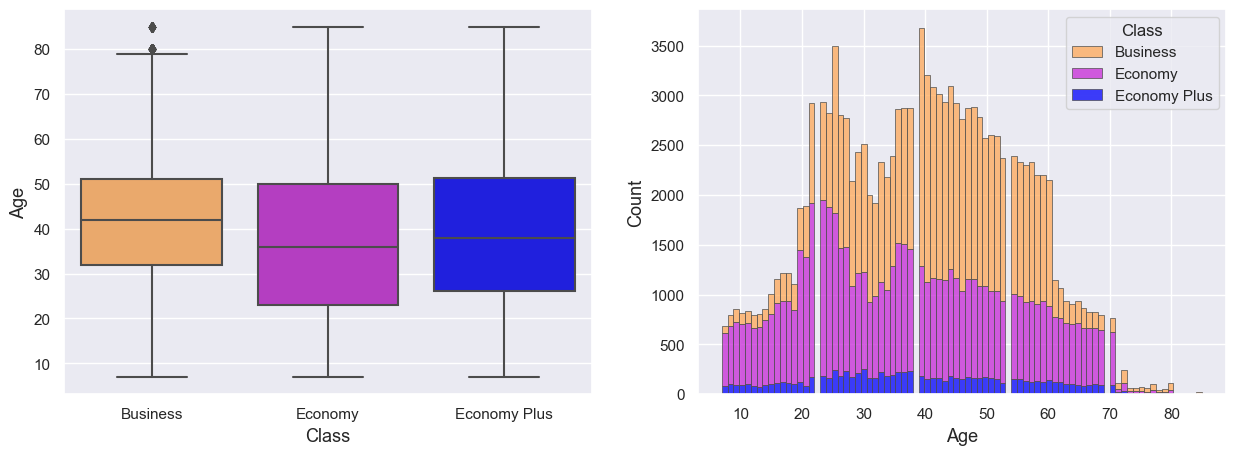

In [43]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

**Observations:**
- Dapat dilihat bahwa rata-rata rentang usia penumpang yang melakukan perjalanan dengan kelas bisnis sama (berdasarkan box chart sebelumnya) dengan rentang usia penumpang reguler. Berdasarkan pengamatan ini, dapat diasumsikan bahwa pelanggan tetap pada umumnya membeli kelas bisnis untuk diri mereka sendiri.

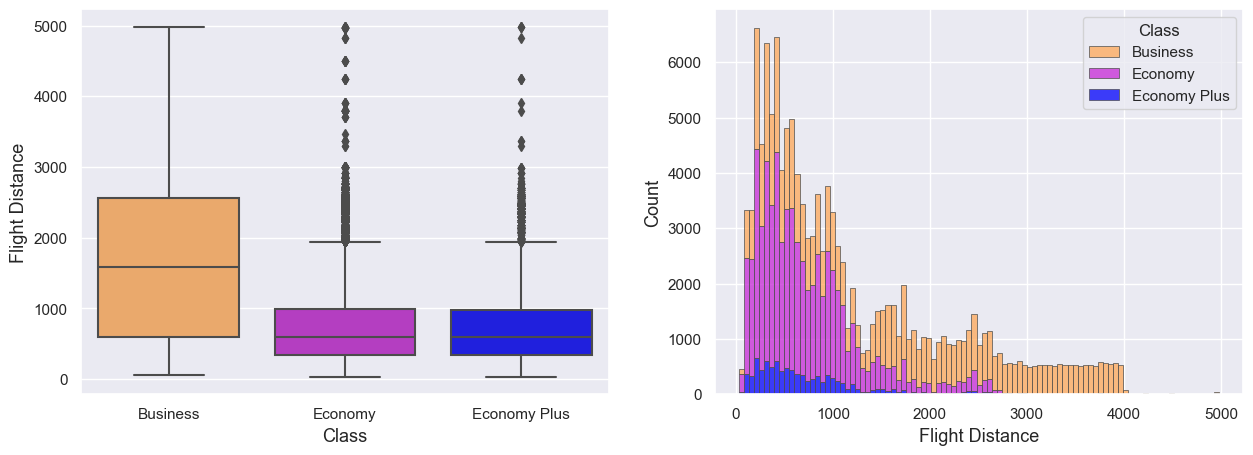

In [44]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

**Observations:**
- Penumpang yang jarak penerbangannya jauh kebanyakan terbang dengan menggunakan kelas bisnis.

# 5. Flight Distance:

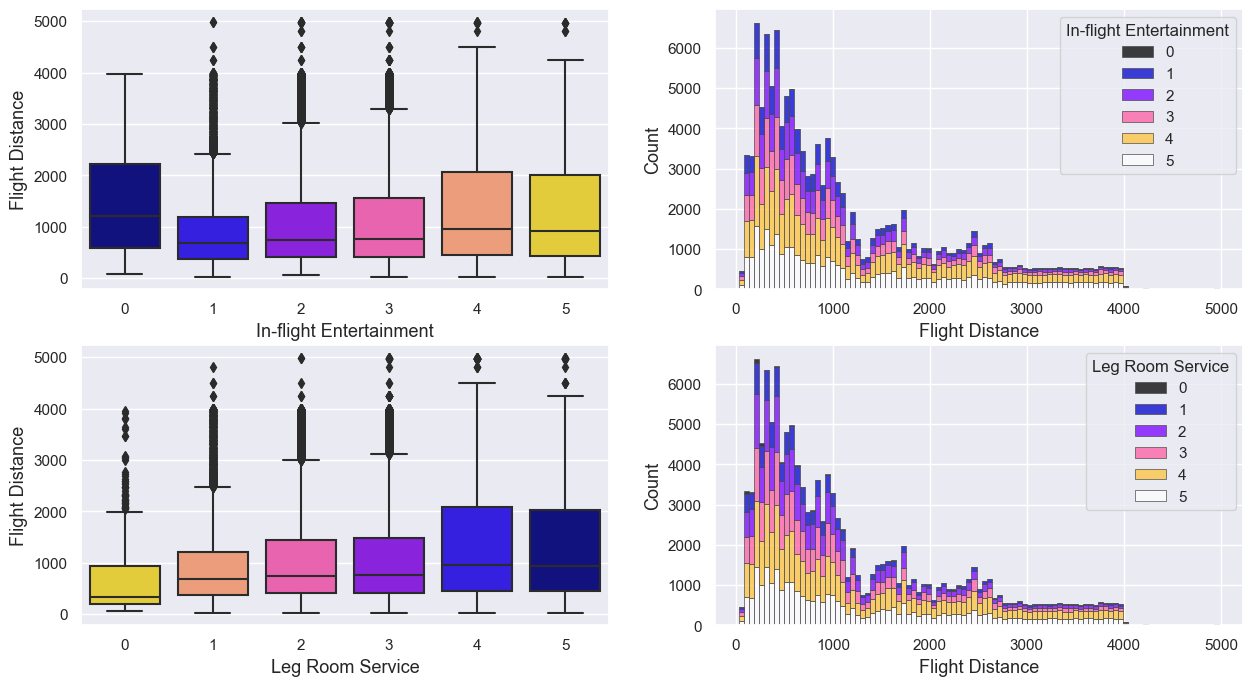

In [45]:
f, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.boxplot(x = "In-flight Entertainment", y = "Flight Distance", palette = "gnuplot2", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight Distance", hue = "In-flight Entertainment", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg Room Service", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight Distance", hue = "Leg Room Service", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[1, 1]);

**Observations:**
- Semakin jauh jarak penerbangan yang ditempuh penumpang pesawat, maka semakin lama pula penumpang dalam penerbangan.
- Sehingga penumpang merasa semakin puas dengan hiburan selama penerbangan dan jarak antar kursi di pesawat (ruang kaki) yg ekstra (secara rata-rata).

# Kesimpulan EDA:

- Jenis kelamin tidak memainkan peran penting dalam kepuasan, karena pria dan wanita tampaknya sama-sama memperhatikan faktor yang sama.
- Jumlah pelanggan setia untuk maskapai tinggi, namun tingkat ketidakpuasannya tinggi terlepas dari loyalitas. Maskapai harus memperhatikan untuk mempertahankan pelanggan setia
- Traveller dengan tujuan bisnis tampaknya lebih puas dengan penerbangan, daripada traveller dengan tujuan pribadi.
- Orang-orang di kelas bisnis tampaknya paling puas dan penumpang yang di kelas ekonomi tampak paling tidak puas.
- Semakin jauh jarak penerbangan, namun sebagian besar penumpang merasa baik-baik saja dengan sedikit keterlambatan keberangkatan, yang merupakan temuan aneh dari plot ini!
- Keterlambatan keberangkatan bukan merupakan faktor untuk penerbangan jarak jauh. Namun, traveller dengan jarak penerbangan yg dekat tampaknya justru merasa tidak senang dengan adanya keterlambatan keberangkatan.
- Sebagian besar penumpang tetap maskapai berusia antara 30 dan 50 tahun (usia rata-rata penumpang sedikit di atas 40 tahun).
- Rentang usia penumpang non-reguler sedikit lebih muda berusia antara 20 hingga 40 tahun (usia rata-rata penumpang sedikit kurang dari 30 tahun).
- Penumpang yang jarak penerbangannya jauh kebanyakan terbang dengan menggunakan kelas bisnis .
- Semakin jauh jarak yang ditempuh penumpang pesawat, maka semakin lama juga penumpang tersebut dalam penerbangan, sehingga semakin puas penumpang dengan hiburan dalam penerbangan dan jarak antar kursi di pesawat yg ekstra.

# Multivariate (Bivariate) Analysis:

## Menggunakan Pearson's Correlation u/ Menggambar Heatmap:

#### Correlation Heatmap u/ Kolom Numerik

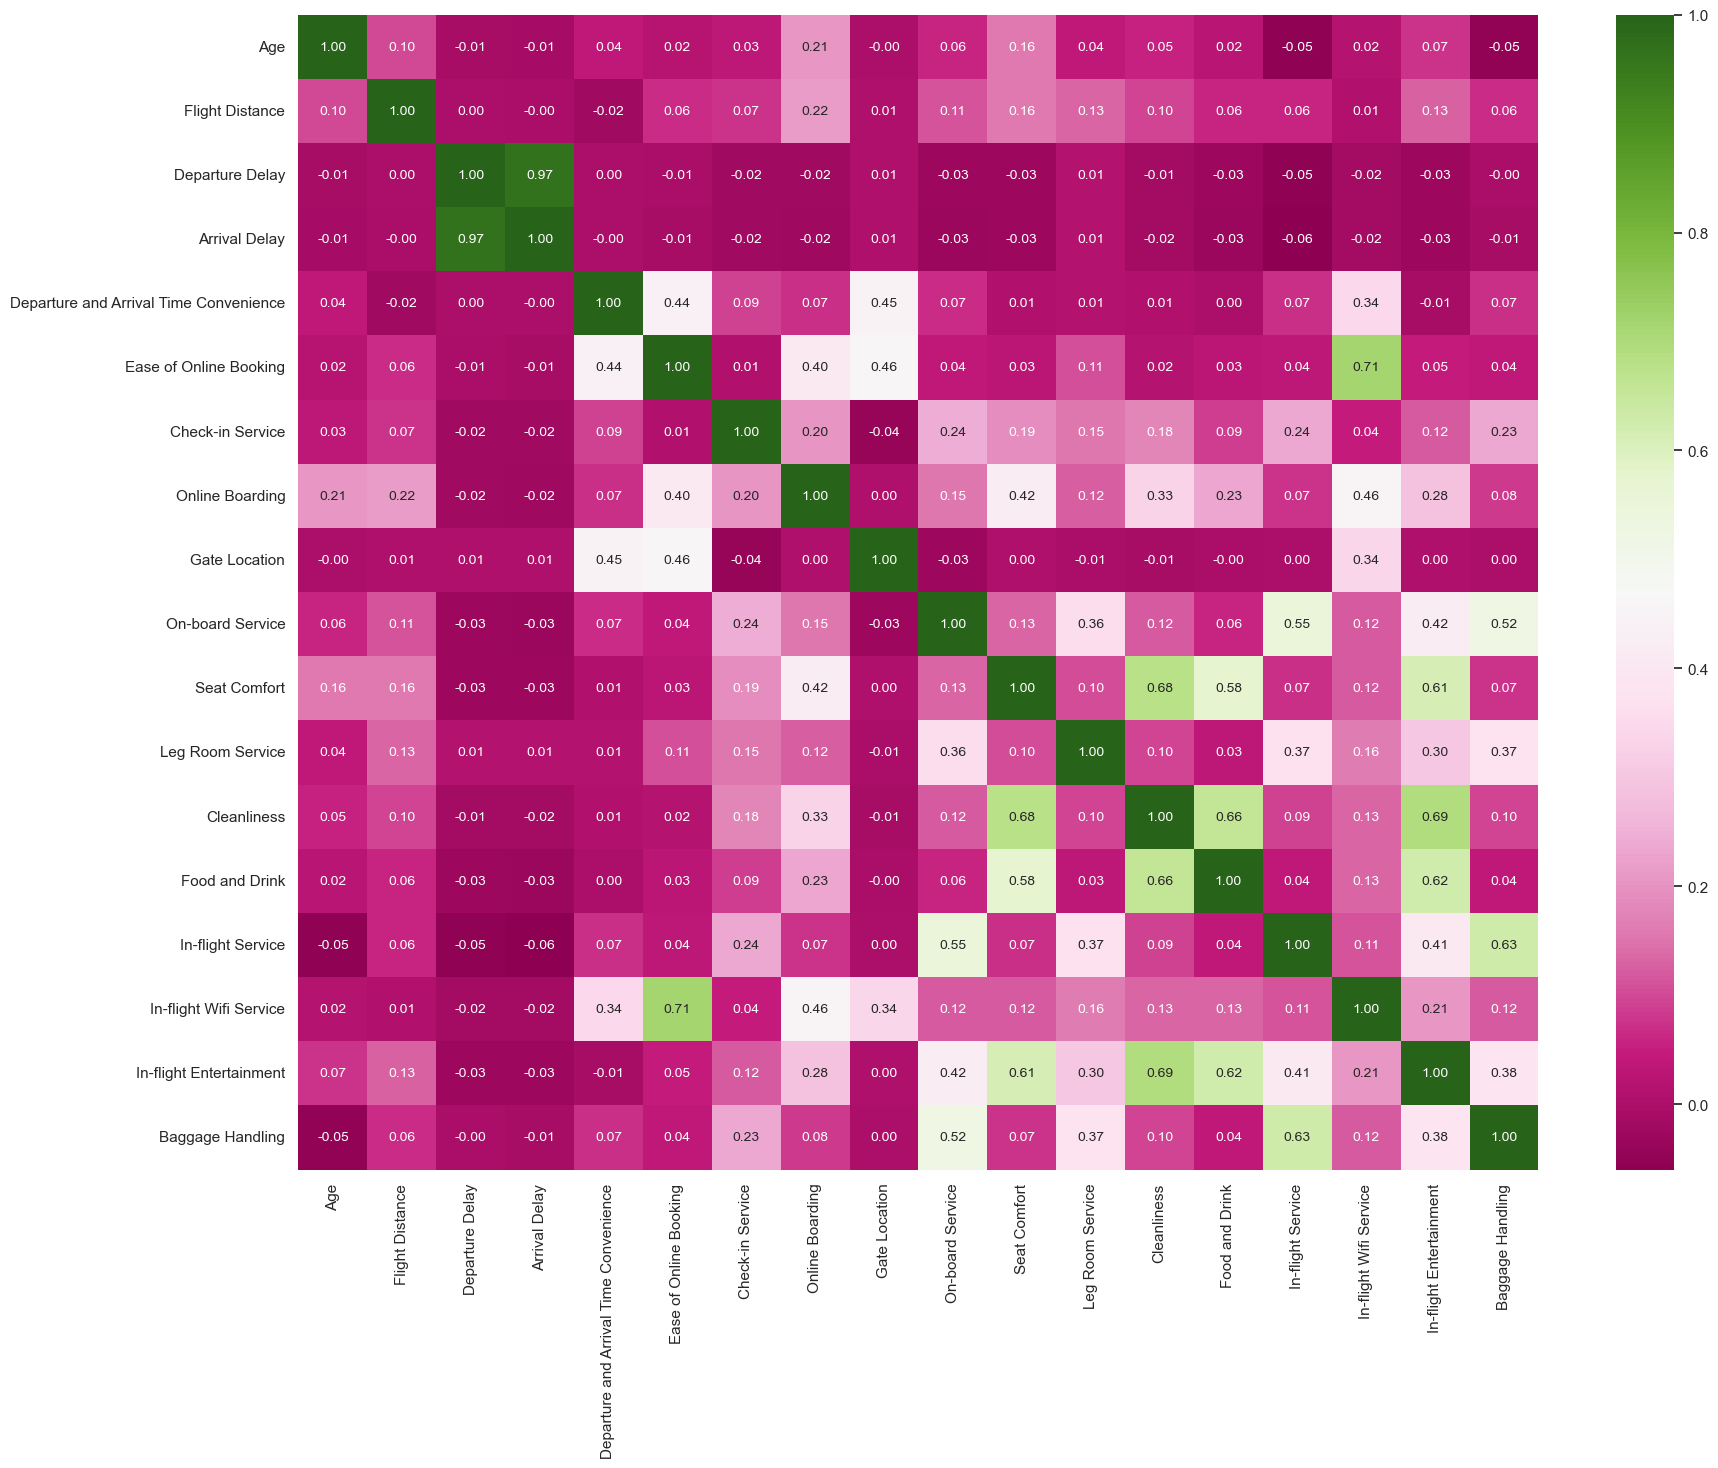

In [46]:
correlation = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'PiYG');

Dari hasil Heatmap di atas menunjukkan bahwa:

- Memiliki 2 fitur, yaitu `Departure Delay` dan `Arrival Delay` yg sangat berkorelasi antar satu sama lainnya. Ini berarti mengandung informasi yg berlebihan, sedangkan untuk melakukan pemodelan hanya dapat memilih 1 dari 2 variabel tersebut.

Cara Membaca `Heatmap` nya:

Misal angka 0.97 pada Departure Delay menginterpretasikan bahwa korelasi linier antara Departure Delay dan Arrival Delay kuat karena mendekati angka 1, dan karena tandanya positif jadi hubungannya kuat dan selaras, semakin tinggi Departure Delay maka Arrival Delay nya juga semakin tinggi (searah). Secara kontekstual, berarti semakin lama waktu Departure Delay maka Arrival Delay nya juga semakin lama. 

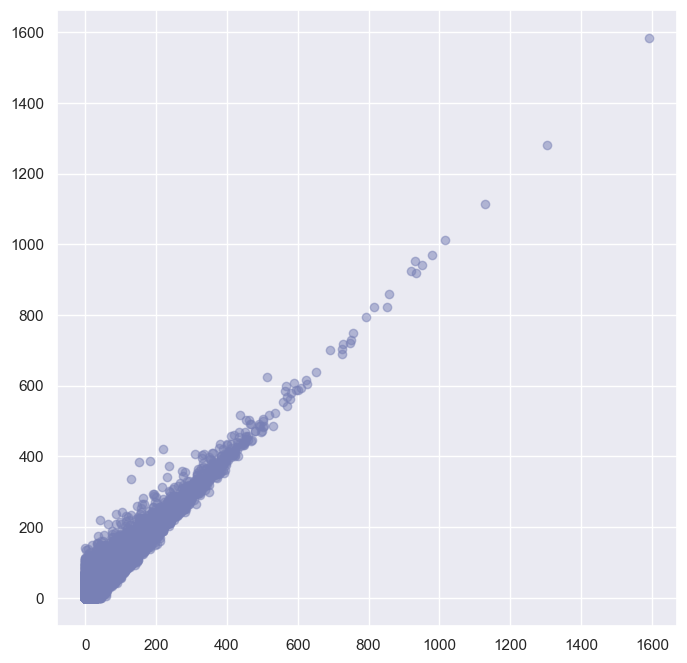

In [47]:
plt.scatter(df['Departure Delay'], df['Arrival Delay'], alpha = 0.5, color = '#7880b5')
pass;

Dapat dilihat dari hasil Scatterplot di atas, titik-titiknya berbaris kurang lebih di sepanjang garis lurus dari pojok kiri bawah ke kanan atas. Dengan demikian, diperkirakan lama waktu keterlambatan kedatangan bergantung pada lama waktu keterlambatan keberangkatan yg bersifat linier.

Sehingga jika waktu penerbangan penumpang maskapai delay selama waktu tertentu saat keberangkatan, maka waktu penerbangan juga akan delay dengan jumlah waktu yang sama saat mendarat (asalkan pesawat tidak berakselerasi selama penerbangan untuk mengganti waktu yang terbuang dan juga selama tidak ada faktor kendala teknis lainnya yg menghambat waktu penerbangan, seperti holding di udara selama menunggu perintah untuk landing dari menara kontrol (Pilot menunggu aba-aba dari ATC), maupun karena faktor cuaca).

**PENJELASAN:**
Alasan korelasi antara keterlambatan keberangkatan dan keterlambatan kedatangan begitu tinggi, antara lain:
- Keterlambatan keberangkatan dan keterlambatan kedatangan sangat berkorelasi karena keduanya merupakan peristiwa yang berkaitan erat dalam proses penerbangan. Penundaan waktu keberangkatan dapat menyebabkan rantai proses dari peristiwa yang berdampak pada sisa penerbangan, termasuk waktu kedatangan. Keberangkatan yang tertunda dapat menyebabkan ketinggalan connecting flight untuk penumpang yg transit, perubahan rute penerbangan, dan waktu tunggu tambahan di bandara penghubung, yang semuanya dapat mengakibatkan keterlambatan kedatangan.
- Selain itu, banyak penyebab keterlambatan keberangkatan juga menjadi penyebab keterlambatan kedatangan. Misalnya, kondisi cuaca buruk dapat berdampak pada waktu keberangkatan dan kedatangan penerbangan, dan masalah dengan pesawat atau awak pesawat dapat mengakibatkan penundaan keberangkatan dan kedatangan yang tertunda.
- Singkatnya, korelasi yang tinggi antara keterlambatan keberangkatan dan keterlambatan kedatangan adalah karena hubungan yang erat antara kedua peristiwa tersebut dan dampak penundaan keberangkatan terhadap sisa penerbangan.

**Question:**
Apakah mungkin jika waktu keberangkatannya tepat waktu namun waktu kedatangannya tertunda?

Ada kemungkinan keberangkatan penerbangan tepat waktu tetapi kedatangannya terlambat, beberapa alasannya antara lain:
- Masalah dalam penerbangan: Masalah tak terduga seperti masalah mekanis, keadaan darurat medis, atau kondisi cuaca dapat muncul selama penerbangan dan menyebabkan penundaan waktu kedatangan.
- Air Traffic Controller (ATC): Pemandu lalu lintas udara yg memberlakukan batasan kepada pilot, seperti pola holding di udara ketika akan landing di bandara tujuan, yang dapat mempengaruhi waktu kedatangan penerbangan meskipun keberangkatannya tepat waktu.
- Perutean ulang: Penerbangan dapat dialihkan di tengah penerbangan karena cuaca atau alasan operasional lainnya, yang menyebabkan penundaan waktu kedatangan.
- Connecting flight (transit) yang terlewatkan: Jika penerbangan lanjutan tertunda, hal ini dapat berdampak pada waktu kedatangan penerbangan berikutnya, bahkan jika penerbangan awal berangkat tepat waktu.

**Kesimpulan:** 
Waktu kedatangan yang tertunda dapat terjadi meskipun keberangkatan tepat waktu karena berbagai alasan yang dapat mempengaruhi penerbangan selama perjalanannya.

# Dependent Variable or Feature:

In [48]:
df["Satisfaction"].value_counts()

Neutral or Dissatisfied    73225
Satisfied                  56262
Name: Satisfaction, dtype: int64

## Check Dependent Variable is Balanced or Not:

In [49]:
round(df["Satisfaction"].value_counts()[1]/(df["Satisfaction"].value_counts()[0]+df["Satisfaction"].value_counts()[1])*100,2)

43.45

In [50]:
target = df['Satisfaction'].value_counts().reset_index()
target.rename(columns={'index':'Satisfaction','Satisfaction':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Satisfaction,freq,percentage
0,Neutral or Dissatisfied,73225,56.55
1,Satisfied,56262,43.45


Dalam hal ini merupakan masalah klasifikasi biner kelas 0 atau 1 yang menunjukkan kepuasan penumpang, Kelas 1 hanya memiliki nilai total 43.45%. Secara teori sudah tidak balance, namun angkanya masih dapat ditoleransi. Oleh karena itu tidak memerlukan Imbalanced Data handling untuk mengatasi hal ini.

# EDA on Feature `Satisfaction`:

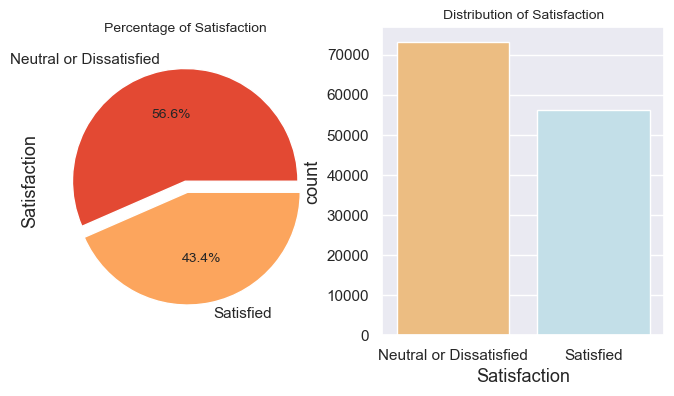

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
df['Satisfaction'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Satisfaction')
sns.countplot(x='Satisfaction',data=df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Satisfaction')
plt.show();

**Observations:**
- Sesuai data yang diberikan sebanyak 56.6% penumpang merasa netral atau tidak puas
- Dan sebanyak 43.4% sisanya penumpang merasa puas.

# Data Preprocessing and Feature Engineering:

## Handling Categorical Column (Encoding)

In [52]:
def categoricals_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [53]:
categoricals_unique(df)

Gender : ['Male' 'Female']
Customer Type : ['First-time' 'Returning']
Type of Travel : ['Business' 'Personal']
Class : ['Business' 'Economy' 'Economy Plus']
Satisfaction : ['Neutral or Dissatisfied' 'Satisfied']


**Note**:
- Encoding Kolom Kategorikal yang memiliki 2 nilai unik seperti: **Male** dan **Female**, **First-time** dan **Returning**, **Business** dan **Personal**, **Neutral or Dissatisfied** dan **Satisfied** yang diwakili dengan **1** dan **0**:
- Sedangkan Encoding Kolom Kategorikal yang memiliki 3 nilai unik seperti pada kolom Class yg memiliki nilai unik `Business`, `Economy` dan `Economy Plus` diwakili dengan 0,1, dan 2.

In [54]:
for i in df.columns:
    if df[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df[i]=label_encoder.fit_transform(df[i])

In [55]:
df['Class'].unique()

array([0, 1, 2])

In [56]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


**Note:**
1. Kolom `Gender`:
- 1: Male (Laki-laki)
- 0: Female (Perempuan)
2. Kolom `Customer Type`:
- 0: First-time
- 1: Returning
3. Kolom `Type of Travel`:
- 0: Business
- 1: Personal
4. Kolom `Class`:
- 0: Business
- 1: Economy
- 2: Economy Plus
5. Kolom `Satisfaction`:
- 0: Neutral or Dissatisfied
- 1: Satisfied

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129487 non-null  int32  
 1   Age                                     129487 non-null  int64  
 2   Customer Type                           129487 non-null  int32  
 3   Type of Travel                          129487 non-null  int32  
 4   Class                                   129487 non-null  int32  
 5   Flight Distance                         129487 non-null  int64  
 6   Departure Delay                         129487 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129487 non-null  int64  
 9   Ease of Online Booking                  129487 non-null  int64  
 10  Check-in Service                        1294

## Split Data: Training-Testing

In [58]:
feature = df.drop(columns = 'Satisfaction')
target = df[['Satisfaction']]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)

In [59]:
feature_train.shape

(103589, 22)

# Lazy Predict:
Lazy Predict adalah pustaka Python yang dirancang untuk membandingkan kinerja berbagai model pembelajaran mesin pada kumpulan data. Menggunakan Lazy Predict sebagai dasar membandingkan model mana yang bekerja paling baik pada dataset ini sehingga mendapatkan model Machine Learning dengan akurasi terbaik.

In [60]:
from lazypredict.Supervised import LazyClassifier

In [61]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(feature_train, feature_test, target_train, target_test)
models

100%|██████████| 29/29 [47:54<00:00, 99.13s/it]   


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.96,0.96,0.96,0.77
XGBClassifier,0.96,0.96,0.96,0.96,2.70
RandomForestClassifier,0.96,0.96,0.96,0.96,28.54
ExtraTreesClassifier,0.96,0.96,0.96,0.96,23.39
BaggingClassifier,0.96,0.96,0.96,0.96,11.10
SVC,0.96,0.95,0.95,0.96,310.17
DecisionTreeClassifier,0.95,0.95,0.95,0.95,2.03
KNeighborsClassifier,0.93,0.93,0.93,0.93,8.68
AdaBoostClassifier,0.93,0.92,0.92,0.93,12.47


Pada tahap ini sebelumnya tidak mengetahui cara memilih algoritme saat melatih model Machine Learning, sehingga diputuskan untuk menggunakan pustaka Lazy Predict di Python agar membandingkan kinerja berbagai model Machine Learning berdasarkan klasifikasi.

Dari hasil di atas, kinerja semua model klasifikasi diberi peringkat berdasarkan kinerjanya. Dari hasil tersebut akan diambil 3 model teratas dengan hasil kinerja terbaik untuk model Machine Learning pada dataset ini. <br>
Tiga model tersebut antara lain: 
1. LGBMClassifier
2. XGBClassifier
3. RandomForestClassifier	

# 1. LGBMClassifier:

In [62]:
import lightgbm as lgb

In [63]:
classification = lgb.LGBMClassifier()
classification.fit(feature_train, target_train)

LGBMClassifier()

## Model Prediction:

In [64]:
# predict the results
target_pred = classification.predict(feature_test)

## Melihat Accuracy Model:

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_pred, target_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred)))

LightGBM Model accuracy score: 0.9651


Dalam hal ini, target_test adalah label kelas sebenarnya dan target_pred adalah label kelas yang diprediksi dalam set pengujian.

## Membandingkan Antara Train dan Test set Accuracy:

Sekarang akan membandingkan akurasi train-set dan test-set untuk memeriksa overfitting.

In [66]:
target_pred_train = classification.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train)))

Training-set accuracy score: 0.9664


## Memeriksa Overfitting:

In [67]:
print('Training set score: {:.4f}'.format(classification.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(classification.score(feature_test, target_test)))

Training set score: 0.9664
Test set score: 0.9651


Akurasi antara set pelatihan dan tes cukup sebanding. Jadi, tidak dapat mengatakan ada overfitting.

## Confusion Matrix:

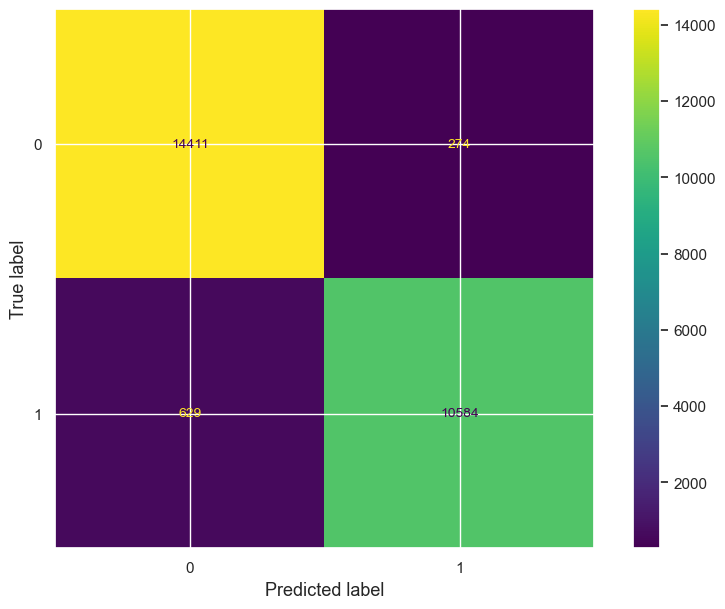

In [68]:
# Matrix confusion:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                             
disp.plot(ax=ax)
plt.show()

- Sebanyak 274 data (penumpang) diprediksi 1 (Satisfied/Puas) ternyata sebenarnya tidak puas atau netral (0).

## Classification Metrics:

In [69]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14685
           1       0.97      0.94      0.96     11213

    accuracy                           0.97     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.97      0.97      0.97     25898



TIPS: Fokus saja pada baris '1'.<br>
Temuan: Modelnya sangat bagus (memuaskan). Skor recall pada data test tinggi, yaitu 0.94.

**Kesimpulan:**<br>
Karena performa pada train data sudah bagus, sehingga Model tidak mengalami Overfitting.

# 2. XGBClassifier:

In [70]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [71]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(feature_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Model Prediction:

In [72]:
# predict the results
target_pred1 = xgb.predict(feature_test)

## Melihat Accuracy Model:

In [73]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(target_pred1, target_test)
print('XGBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred1)))

XGBClassifier Model accuracy score: 0.9637


## Membandingkan Antara Train dan Test set Accuracy:

In [86]:
target_pred_train1 = xgb.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train1)))

Training-set accuracy score: 0.9758


In [85]:
#import the model

from xgboost import XGBClassifier

#fit the model
xgb = XGBClassifier()
xgb.fit(feature_train, target_train)

# prediction
pred_train = xgb.predict(feature_train)

# model name
model_name = str(type(xgb)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(target_train, pred_train,
                                    target_names=['Neutral or Dissatisfied', 'Satisfied']))

print("Accuracy score for training dataset",accuracy_score(target_train, pred_train))

		XGBCLASSIFIER MODEL

Training part:
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.97      0.99      0.98     58540
              Satisfied       0.98      0.96      0.97     45049

               accuracy                           0.98    103589
              macro avg       0.98      0.97      0.98    103589
           weighted avg       0.98      0.98      0.98    103589

Accuracy score for training dataset 0.9757503209800268


## Memeriksa Overfitting:

In [87]:
print('Training set score: {:.4f}'.format(xgb.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(xgb.score(feature_test, target_test)))

Training set score: 0.9758
Test set score: 0.9637


Akurasi antara set pelatihan dan tes cukup sebanding. Jadi, tidak dapat mengatakan ada overfitting.

# 3. RandomForestClassifier:

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(feature_train, target_train)

RandomForestClassifier(random_state=0)

## Model Prediction:

In [90]:
# predict the results
target_pred2 = rfc.predict(feature_test)

## Melihat Accuracy Model:

In [92]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(target_pred2, target_test)
print('RandomForestClassifier Model accuracy score : {0:0.4f}'. format(accuracy_score(target_test, target_pred2)))

RandomForestClassifier Model accuracy score : 0.9633


## Membandingkan Antara Train dan Test set Accuracy:

In [93]:
target_pred_train2 = rfc.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train2)))

Training-set accuracy score: 1.0000


## Memeriksa Overfitting:

In [94]:
print('Training set score: {:.4f}'.format(rfc.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(rfc.score(feature_test, target_test)))

Training set score: 1.0000
Test set score: 0.9633


Akurasi antara set pelatihan dan tes lumayan sebanding jika dibulatkan. Jadi, tidak dapat mengatakan ada overfitting.

**Observations:**
Sesuai dengan hasil dari Lazy Predict, 3 model teratas yg dipilih akurasinya sudah baik dan tidak ada Overfitting yg terdeteksi.

Di antara 3 model tersebut, angka yg hasil akurasi tesnya paling sebanding yaitu model LGBMClassifier.

# Business Insight & Recommendation for Airline Passenger Satisfaction Prediction:

Berdasarkan hasil Exploratory Data Analysis (EDA) dan permodelan prediktif, dapat dibuat beberapa business insight dan rekomendasi untuk meningkatkan kepuasan penumpang maskapai, antara lain:
- Fokus pada peningkatan pendorong utama bagi kepuasan penumpang: Berdasarkan EDA, maskapai penerbangan harus fokus pada peningkatan pendorong utama kepuasan penumpang, seperti meminimalisir keterlambatan waktu penerbangan, kemudahan dalam Pemesanan Tiket pesawat Online seperti yg dilihat dari hasil EDA bahwa pelanggan setia lebih banyak berusia 30-50 an, dimana di usia tersebut tidak terlalu update dengan teknologi seperti pada kaum milenial.
- Menargetkan segmen pelanggan tertentu: EDA dapat mengungkapkan perbedaan yang signifikan dalam skor kepuasan penumpang antara segmen pelanggan yang berbeda, seperti usia, tujuan perjalanan maupun kelas yg digunakan. Maskapai penerbangan dapat menggunakan informasi ini untuk menargetkan segmen pelanggan tertentu dengan pengalaman yang sesuai, seperti menawarkan layanan penerbangan khusus atau promosi ke demografi tertentu. Diharapkan dapat meningkatkan pelayanan untuk kelas penerbangan Economy atau Economy Plus sehingga persentase penumpang dari kelas tersebut dapat naik, sehingga bukan hanya penumpang dengan kelas Bisnis yg merasa puas.
- Mengumpulkan dan menganalisis umpan balik penumpang secara terus-menerus: Maskapai harus terus mengumpulkan dan menganalisis umpan balik penumpang untuk memastikan bahwa maskapai memiliki informasi terkini tentang apa yang diinginkan dan dibutuhkan pelanggan mereka. Informasi ini dapat digunakan untuk melakukan peningkatan yang ditargetkan pada pengalaman penumpang dan memastikan bahwa maskapai memenuhi kebutuhan pelanggan yang terus berkembang.

# Business impact of airline passenger satisfaction prediction:

Dampak bisnis dari prediksi kepuasan penumpang maskapai dapat menjadi signifikan bagi maskapai. Beberapa manfaat utama meliputi:
- Peningkatan kepuasan penumpang: Dengan menggunakan pemodelan prediktif untuk mendorong kepuasan penumpang, maskapai penerbangan dapat mengambil tindakan yang ditargetkan untuk meningkatkan pengalaman penumpang. Ini akan menghasilkan peningkatan kepuasan penumpang, yang dapat mengarah pada peningkatan loyalitas pelanggan dan peningkatan bisnis berulang.
- Peningkatan loyalitas pelanggan: Penumpang yang puas cenderung memilih maskapai penerbangan yang sama untuk kebutuhan perjalanan mereka di masa mendatang, yang dapat menghasilkan peningkatan loyalitas pelanggan dan peningkatan bisnis.
- Alokasi sumber daya yang lebih baik: Dengan memahami pendorong utama kepuasan penumpang, maskapai penerbangan dapat mengalokasikan sumber daya mereka secara lebih efektif untuk meningkatkan area yang memiliki dampak terbesar pada kepuasan penumpang. Ini akan menghasilkan penggunaan sumber daya yang lebih efisien dan pengembalian investasi yang lebih baik.
- Peningkatan pendapatan: Peningkatan kepuasan penumpang dapat meningkatkan pendapatan maskapai, karena penumpang yang puas cenderung memesan penerbangan tambahan dan merekomendasikan maskapai kepada orang lain.
- Keunggulan kompetitif: Dengan menggunakan pemodelan prediktif untuk memahami faktor pendorong kepuasan penumpang, maskapai penerbangan dapat memperoleh keunggulan kompetitif dibandingkan maskapai lain yang tidak menggunakan teknologi ini. Ini dapat membantu maskapai untuk menarik lebih banyak penumpang dan meningkatkan pangsa pasar mereka.

Dengan menggunakan model tersebut, dapat membantu Maskapai dalam fokus penerapan pada segmen penumpang yg masih merasa tidak puas atau netral agar menjadi merasa Puas.

# **References:**

- Khawal, Aman. 2021. Lazy Predict in Python (Tutorial), https://thecleverprogrammer.com/2021/06/19/lazy-predict-in-python-tutorial/.<br>
- Tang, Travis. 2022. Lazypredict: Run All Sklearn Algorithms With a Line Of Code, https://pub.towardsai.net/lazypredict-run-all-sklearn-algorithms-with-a-line-of-code-29d73d82499c.<br>
- Banerjee, Prashant. 2020. LightGBM Classifier in Python, https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python.
- Sadale, Rohan. 2016. XGBClassifier and RandomForest in Python, https://www.kaggle.com/code/rohansadale/xgbclassifier-and-randomforest-in-python.
- Banerjee, Prashant. 2020. Random Forest Classifier Tutorial, https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial.